In [4]:
import pandas as pd
import numpy as np
from collections import Counter
import codecs
import re
import os
import pymorphy2
from stop_words import get_stop_words
from tqdm import tqdm
import artm
import syntaxnet

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

## 1. Готовим модальности

In [93]:
import prepare_fillmore_roles
import prepare_triplets
import prepare_tonal_words

In [94]:
path = './trump/'
name = 'trump'

In [95]:
# sn = syntaxnet.get_sn_from_raw(path, name+'_labelled.txt', path+name+'_sn.csv')
sn = pd.read_csv(path+name+'_sn.csv', index_col=0)

In [96]:
prepare_tonal_words.prepare_tonal_vw(sn, path, name+'_tonal_vw')

100%|██████████| 221/221 [00:20<00:00, 10.95it/s]


In [5]:
prepare_fillmore_roles.prepare_fillmore_vw(path, name+'_labelled.txt', name+'_roles_vw')

100%|██████████| 221/221 [10:18<00:00,  2.80s/it]


In [4]:
prepare_triplets.prepare_triplet_vw(path, name+'_labelled.txt', name+'_triplets_vw')

  0%|          | 1/221 [00:18<1:07:09, 18.31s/it]

['президент:1', 'сша:1', 'дом:1', 'потепление:1', 'трамп:2', 'план:1', 'дональд:1', 'газа:1', 'перевооружение:1', 'сторона:1', 'топливо:1', 'соглашение:9']


  1%|          | 2/221 [00:30<55:51, 15.31s/it]  

['участник:2', 'город:1', 'мера:1', 'позиция:1', 'газа:1', 'потепление:1', 'дональд:1', 'лидер:1', 'семёрка:1', 'агентство:1', 'соглашение:1', 'таормина:1']


  1%|▏         | 3/221 [00:42<51:36, 14.21s/it]

['участник:2', 'город:1', 'мера:1', 'позиция:1', 'газа:1', 'потепление:1', 'дональд:1', 'лидер:1', 'семёрка:1', 'агентство:1', 'соглашение:1', 'таормина:1']


  2%|▏         | 4/221 [00:56<51:00, 14.10s/it]

['неделя:2', 'канцлер:1', 'президент:1', 'джентилонить:1', 'вопрос:2', 'dw:1', 'страна:3', 'газа:1', 'трамп:3', 'семёрка:1', 'решение:1', 'меркель:2', 'соглашение:7', 'конвенция:1']


  2%|▏         | 5/221 [01:10<50:59, 14.17s/it]

['неделя:2', 'канцлер:1', 'президент:1', 'джентилонить:1', 'вопрос:2', 'dw:1', 'страна:3', 'газа:1', 'трамп:3', 'семёрка:1', 'решение:1', 'меркель:2', 'соглашение:7', 'конвенция:1']


  3%|▎         | 6/221 [01:24<50:10, 14.00s/it]

['неделя:2', 'канцлер:1', 'президент:1', 'джентилонить:1', 'вопрос:2', 'dw:1', 'страна:3', 'газа:1', 'трамп:3', 'семёрка:1', 'решение:1', 'меркель:2', 'соглашение:7', 'конвенция:1']


  3%|▎         | 7/221 [01:37<49:37, 13.91s/it]

['маск:4', 'глава:1', 'место:1', 'ряд:1', 'сша:1', 'илона:2', 'потепление:1', 'трамп:3', 'дональд:2', 'лидер:3', 'совет:1', 'решение:1', 'соглашение:5', 'предприниматель:1']


  4%|▎         | 8/221 [01:50<48:53, 13.77s/it]

['президент:2', 'условие:1', 'риа:1', 'бизнес:1', 'газа:1', 'потепление:1', 'новость:1', 'сделка:1', 'дональд:1', 'план:1', 'перевооружение:1', 'сторона:1', 'топливо:1', 'соглашение:10']


  4%|▍         | 9/221 [02:05<49:18, 13.95s/it]

['президент:1', 'условие:1', 'газ:1', 'риа:1', 'бизнес:1', 'действие:2', 'ряд:1', 'газа:1', 'потепление:1', 'трамп:3', 'новость:1', 'сделка:2', 'лидер:3', 'перевооружение:1', 'документ:1', 'обещание:1', 'соглашение:9']


  5%|▍         | 10/221 [02:20<49:14, 14.00s/it]

['хлопонин:2', 'газ:1', 'действие:1', 'сша:2', 'вицепремьер:1', 'страна:1', 'новость:1', 'трамп:1', 'план:1', 'изменение:1', 'выход:1', 'потепление:1', 'газа:1', 'доля:2', 'цель:1', 'сторона:1', 'топливо:1', 'соглашение:6', 'перевооружение:1', 'климат:1']


  5%|▍         | 11/221 [02:34<49:09, 14.04s/it]

['маск:2', 'президент:1', 'штат:1', 'газа:1', 'потепление:1', 'трамп:1', 'план:1', 'бизнесмен:2', 'дональд:1', 'перевооружение:1', 'совет:5', 'сторона:1', 'топливо:1', 'соглашение:10']


  5%|▌         | 12/221 [02:48<48:56, 14.05s/it]

['лидер:2', 'источник:1', 'деталь:1', 'реализация:2', 'президент:1', 'риа:1', 'газа:1', 'топливо:1', 'сми:1', 'дом:1', 'потепление:1', 'новость:1', 'скотт:1', 'дональд:1', 'сторона:1', 'окружение:1', 'участник:1', 'глава:1', '27:1', 'сша:1', 'трамп:4', 'план:1', 'перевооружение:1', 'группа:1', 'декларация:1', 'среда:1', 'соглашение:12', 'песков:1']


  6%|▌         | 13/221 [03:02<48:36, 14.02s/it]

['участие:1', 'лидер:2', 'место:1', 'газа:1', 'топливо:1', 'гонка:1', 'скотт:1', 'потепление:1', 'сторона:1', 'окружение:1', 'глава:1', '27:1', 'отрасль:2', 'трамп:4', 'план:1', 'группа:2', 'перевооружение:1', 'декларация:1', 'добыча:1', 'среда:1', 'соглашение:9']


  6%|▋         | 14/221 [03:16<48:23, 14.03s/it]

['обама:2', 'администрация:1', 'город:3', 'президент:2', 'роль:1', 'инвестирование:2', 'число:1', 'страна:2', 'сша:1', 'планета:1', 'трамп:1', 'предприятие:3', 'государство:4', 'заявление:1', 'масштаб:1', 'поколение:1', 'агентство:1', 'соглашение:5', 'переговоры:1']


  7%|▋         | 15/221 [03:28<47:39, 13.88s/it]

['маск:2', 'илона:1', 'трамп:1', 'space:1', 'ничто:1', 'угроза:1', 'выход:1', 'дональд:1', 'совет:1', 'соглашение:3', 'x:1', 'основатель:1']


  7%|▋         | 16/221 [03:40<47:07, 13.79s/it]

['лидер:2', 'источник:1', 'деталь:1', 'реализация:2', 'президент:1', 'газа:1', 'топливо:1', 'сми:1', 'дом:1', 'потепление:1', 'скотт:1', 'дональд:1', 'сторона:1', 'окружение:1', 'участник:1', 'глава:1', '27:1', 'сша:1', 'трамп:3', 'план:1', 'перевооружение:1', 'группа:1', 'декларация:1', 'среда:1', 'соглашение:12', 'песков:1']


  8%|▊         | 17/221 [03:53<46:36, 13.71s/it]

['вашингтон:1', 'условие:1', 'независимость:1', 'президент:1', 'газ:1', 'ряд:1', 'потепление:2', 'трамп:2', 'документ:1', 'обязательство:1', 'соглашение:7']


  8%|▊         | 18/221 [04:04<46:02, 13.61s/it]

['усилие:1', 'лайф:1', 'глава:1', 'президент:1', 'решение:1', 'разочарование:1', 'страна:1', 'представитель:1', 'газа:1', 'трамп:1', 'лидер:2', 'решение выйти:1', 'соглашение:3', 'дюжаррик:2']


  9%|▊         | 19/221 [04:17<45:40, 13.57s/it]

['усилие:1', 'лайф:1', 'глава:1', 'президент:1', 'решение:1', 'разочарование:1', 'страна:1', 'представитель:1', 'газа:1', 'трамп:1', 'лидер:2', 'решение выйти:1', 'соглашение:3', 'дюжаррик:2']


  9%|▉         | 20/221 [04:30<45:13, 13.50s/it]

['ископаемое:1', 'участник:1', 'канцлер:1', 'президент:1', 'интерес:1', 'потепление:1', 'меркель:1', 'соглашение:2', 'дискуссия:1']


 10%|▉         | 21/221 [04:42<44:46, 13.43s/it]

['страна:1', 'интерфакс:1', 'режим:1', 'издание:2', 'президент:1', 'команда:2', 'газа:1', 'момент:1', 'никарагуа:1', 'инициировать:1', 'американец:1', 'кампания:1', 'представитель:1', 'потепление:1', 'сирия:1', 'процедура:1', 'роль:1', 'сша:2', 'трамп:2', 'среда:1', 'соглашение:5', 'прюитта:1']


 10%|▉         | 22/221 [04:53<44:17, 13.36s/it]

['планет:1', 'штат:2', 'газ:1', 'посол:1', 'страна:2', 'газа:1', 'потепление:1', 'трамп:1', 'план:1', 'каприо:1', 'дональд:1', 'сторона:1', 'перевооружение:1', 'актёр:2', 'топливо:1', 'соглашение:10']


 10%|█         | 23/221 [05:05<43:49, 13.28s/it]

['планет:1', 'штат:2', 'газ:1', 'посол:1', 'страна:2', 'газа:1', 'потепление:1', 'трамп:1', 'план:1', 'каприо:1', 'дональд:1', 'сторона:1', 'перевооружение:1', 'актёр:2', 'топливо:1', 'соглашение:10']


 11%|█         | 24/221 [05:17<43:29, 13.25s/it]

['оставаться:1', 'сми:1', 'тускнуть:2', 'президент:3', 'эффект:1', 'сша:3', 'обращение:3', 'страна:1', 'трамп:5', 'признак:1', 'дональд:1', 'приверженность:1', 'совет:1', 'доля:2', 'меркель:2', 'соглашение:10', 'климат:1']


 11%|█▏        | 25/221 [05:30<43:08, 13.21s/it]

['оставаться:1', 'сми:1', 'тускнуть:2', 'президент:3', 'эффект:1', 'сша:3', 'обращение:3', 'страна:1', 'трамп:5', 'признак:1', 'дональд:1', 'приверженность:1', 'совет:1', 'доля:2', 'меркель:2', 'соглашение:10', 'климат:1']


 12%|█▏        | 26/221 [05:41<42:44, 13.15s/it]

['глава:2', 'тускнуть:4', 'трамп:2', 'дональд:1', 'совет:1', 'соглашение:2', 'климат:1']


 12%|█▏        | 27/221 [05:54<42:26, 13.13s/it]

['глава:2', 'тускнуть:4', 'трамп:2', 'дональд:1', 'совет:1', 'соглашение:2', 'климат:1']


 13%|█▎        | 28/221 [06:06<42:08, 13.10s/it]

['производство:1', 'президент:4', 'условие:1', 'газ:1', 'reuters:1', 'дом:1', 'сша:1', 'отрасль:1', 'трамп:2', 'дональд:1', 'семёрка:1', 'суббота:1', 'обещание:1', 'договор:1', 'соглашение:2', 'g7:1', 'странчлен:1']


 13%|█▎        | 29/221 [06:18<41:49, 13.07s/it]

['производство:1', 'президент:4', 'условие:1', 'газ:1', 'reuters:1', 'дом:1', 'сша:1', 'отрасль:1', 'трамп:2', 'дональд:1', 'семёрка:1', 'суббота:1', 'обещание:1', 'договор:1', 'соглашение:2', 'g7:1', 'странчлен:1']


 14%|█▎        | 30/221 [06:32<41:37, 13.07s/it]

['союзник:1', 'президент:4', 'независимость:1', 'штат:2', 'газ:1', 'ряд:1', 'потепление:2', 'трамп:3', 'дональд:1', 'источник:2', 'документ:1', 'обязательство:1', 'агентство:1', 'соглашение:4']


 14%|█▍        | 31/221 [06:45<41:24, 13.08s/it]

['протокол:1', 'глава:1', 'президент:1', 'снижение:1', '113:1', 'мера:1', 'речь:1', 'команда:1', 'газа:1', 'потепление:1', 'трамп:1', 'конвенция:2', 'выход:2', 'механизм:1', 'документ:2', 'сообщил портал:1', 'среда:1', 'соглашение:5', 'axios:1']


 14%|█▍        | 32/221 [06:57<41:06, 13.05s/it]

['протокол:1', 'газ:1', 'страна:2', 'режим:1', 'деталь:1', 'издание:2', 'президент:2', 'команда:1', 'газа:1', 'момент:1', 'кампания:1', 'представитель:1', 'потепление:1', 'дональд:1', 'процедура:1', 'роль:1', 'сша:2', 'трамп:1', 'среда:1', 'соглашение:8', 'решить:2', 'прюитта:1']


 15%|█▍        | 33/221 [07:09<40:49, 13.03s/it]

['совесть:1', 'сад:1', 'сми:2', 'глава:1', 'участник:2', 'президент:1', 'штат:1', 'место:2', 'сша:1', 'дом:2', 'потепление:1', 'трамп:4', 'перевооружение:1', 'дональд:1', 'очередь:1', 'среда:1', 'соглашение:7', 'следование:1', 'долг:1']


 15%|█▌        | 34/221 [07:22<40:35, 13.03s/it]

['совесть:1', 'сад:1', 'сми:2', 'глава:1', 'участник:2', 'президент:1', 'штат:1', 'место:2', 'сша:1', 'дом:2', 'потепление:1', 'трамп:4', 'перевооружение:1', 'дональд:1', 'очередь:1', 'среда:1', 'соглашение:7', 'следование:1', 'долг:1']


 16%|█▌        | 35/221 [07:35<40:20, 13.01s/it]

['помощник:1', 'положение:1', 'процесс:1', 'президент:8', 'сша:2', 'страна:2', 'трамп:4', 'заявление:1', 'семёрка:1', 'среда:1', 'соглашение:4', 'axios:1']


 16%|█▋        | 36/221 [07:47<40:02, 12.98s/it]

['канцлер:3', 'администрация:1', 'президент:1', 'интерес:1', 'риа:1', 'вопрос:1', 'побережье:1', 'потепление:1', 'новость:1', 'план:1', 'газа:1', 'перевооружение:1', 'трамп:1', 'семёрка:2', 'меркель:1', 'сторона:1', 'топливо:1', 'соглашение:4', 'саммит:1', 'дискуссия:2']


 17%|█▋        | 37/221 [07:59<39:44, 12.96s/it]

['канцлер:3', 'администрация:1', 'президент:1', 'интерес:1', 'риа:1', 'вопрос:1', 'газа:1', 'потепление:1', 'новость:1', 'план:1', 'перевооружение:1', 'трамп:1', 'побережье:1', 'семёрка:2', 'меркель:1', 'сторона:1', 'топливо:1', 'соглашение:4', 'саммит:1', 'дискуссия:2']


 17%|█▋        | 38/221 [08:12<39:29, 12.95s/it]

['протокол:1', 'газ:1', 'страна:4', 'предприятие:1', 'выгода:1', 'решение:4', 'долг:1', 'вашингтон:1', 'президент:4', 'условие:1', 'место:1', 'положение:1', 'степень:1', 'кампания:1', 'представитель:1', 'расчёт:2', 'дональд:1', 'пример:1', 'сша:2', 'выполнение:1', 'трамп:3', 'вступление:1', 'сделка:1', 'соглашение:13']


 18%|█▊        | 39/221 [08:23<39:09, 12.91s/it]

['президент:3', 'штат:1', 'премьерминистр:1', 'дональд:3', 'семёрка:1', 'соглашение:2', 'таормина:1']


 18%|█▊        | 40/221 [08:35<38:54, 12.90s/it]

['глава:1', 'президент:4', 'газ:1', 'команда:1', 'представитель:1', 'скотт:1', 'трамп:1', 'момент:1', 'дональд:1', 'кампания:1', 'выход:2', 'режим:1', 'лидер:1', 'решение:1', 'процедура:1', 'среда:1', 'издание:1', 'соглашение:6', 'семёрка:1']


 19%|█▊        | 41/221 [08:47<38:35, 12.86s/it]

['глава:1', 'президент:1', 'газ:1', 'скотт:1', 'трамп:1', 'потепление:1', 'дело:1', 'группа:1', 'выход:1', 'источник:1', 'лидер:1', 'решение:1', 'обещание:1', 'среда:1', 'деталь:1', 'соглашение:2', 'декларация:1', 'axios:1', 'портал:2']


 19%|█▉        | 42/221 [09:00<38:22, 12.86s/it]

['обама:2', 'инвестирование:2', 'страна:2', 'предприятие:3', 'масштаб:1', 'поколение:1', 'агентство:1', 'переговоры:1', 'администрация:1', 'президент:2', 'газа:1', 'топливо:1', 'потепление:1', 'новость:1', 'государство:4', 'vesti:1', 'сторона:1', 'планета:1', 'роль:1', 'город:3', 'число:1', 'сша:1', 'трамп:1', 'план:1', 'перевооружение:1', 'заявление:1', 'соглашение:12']


 19%|█▉        | 43/221 [09:12<38:05, 12.84s/it]

['последствие:1', 'разочарование:1', 'представитель:2', 'изменение:1', 'семёрка:1', 'соглашение:2', 'конвенция:1']


 20%|█▉        | 44/221 [09:24<37:50, 12.83s/it]

['маск:5', 'лицо:1', 'протокол:1', 'администрация:1', 'вашингтон:1', 'руководитель:1', 'дом:1', 'cnbc:1', 'представитель:1', 'бизнесмен:1', 'компания:1', 'выход:1', 'совет:3', 'решение:1', 'соглашение:8', 'основатель:1']


 20%|██        | 45/221 [09:37<37:39, 12.84s/it]

['степень:1', 'условие:1', 'газ:1', 'штат:4', 'место:2', 'бизнес:1', 'дом:1', 'кампания:2', 'страна:6', 'трамп:2', 'сделка:2', 'сша:1', 'лидер:1', 'отрасль:1', 'среда:1', 'рассудок:1', 'положение:1', 'преимущество:1', 'соглашение:17', 'переговоры:1']


 21%|██        | 46/221 [09:49<37:22, 12.81s/it]

['президент:3', 'франция:1', 'германия:1', 'макрон:1', 'трамп:1', 'инициатива:1', 'решение:1', 'меркель:1', 'соглашение:3']


 21%|██▏       | 47/221 [10:01<37:06, 12.80s/it]

['обама:1', 'иванка:3', 'муж:2', 'лидер:3', 'источник:1', 'совет:5', 'агентство:1', 'основатель:1', 'президент:1', 'место:1', 'сфера:1', 'журналист:1', 'предшественник:1', 'дочь:1', 'джаред:1', 'маск:3', 'лагерь:1', 'сми:2', 'работа:1', 'дом:1', 'планирование:1', 'трамп:3', 'кушнер:1', 'ничто:2', 'шаг:2', 'соглашение:4']


 22%|██▏       | 48/221 [10:14<36:53, 12.80s/it]

['сми:2', 'глава:1', 'президент:4', 'риа:1', 'деталь:1', '27:1', 'скотт:1', 'трамп:3', 'новость:1', 'группа:1', 'лидер:2', 'источник:1', 'декларация:1', 'среда:1', 'окружение:2', 'соглашение:3']


 22%|██▏       | 49/221 [10:26<36:38, 12.78s/it]

['сми:1', 'сенатор:2', 'протокол:1', 'тускнуть:1', 'президент:1', 'газ:1', 'кампания:1', 'большинство:1', 'представитель:1', 'трамп:1', 'дональд:1', 'макконнелла:1', 'письмо:1', 'совет:1', 'председатель:2', 'соглашение:10', 'интерфаксукраина:1', 'климат:1']


 23%|██▎       | 50/221 [10:38<36:25, 12.78s/it]

['протокол:1', 'газ:1', 'эпоха:1', 'температура:1', 'страна:2', 'режим:1', 'документ:4', 'деталь:1', 'издание:2', 'президент:3', 'команда:1', 'газа:1', 'момент:1', 'кампания:1', 'представитель:1', 'потепление:1', 'дональд:1', 'цель:1', 'процедура:1', 'роль:1', 'сша:2', 'трамп:1', 'среда:1', 'соглашение:8', 'решить:2', 'прюитта:1']


 23%|██▎       | 51/221 [10:51<36:10, 12.77s/it]

['сми:1', 'сенатор:2', 'протокол:1', 'президент:3', 'газ:1', 'кампания:1', 'большинство:1', 'представитель:1', 'трамп:1', 'дональд:1', 'макконнелла:1', 'письмо:1', 'соглашение:10', 'интерфаксукраина:1']


 24%|██▎       | 52/221 [11:03<35:55, 12.76s/it]

['протокол:1', 'газ:1', 'страна:2', 'режим:1', 'деталь:1', 'издание:2', 'президент:4', 'команда:1', 'газа:1', 'момент:1', 'информация:1', 'сми:1', 'кампания:1', 'представитель:1', 'потепление:1', 'дональд:1', 'процедура:1', 'роль:1', 'сша:2', 'трамп:2', 'среда:1', 'соглашение:9', 'решить:2', 'прюитта:1']


 24%|██▍       | 53/221 [11:15<35:41, 12.75s/it]

['неделя:1', 'президент:2', 'reuters:1', 'эффект:1', 'кампания:1', 'сша:2', 'потепление:1', 'трамп:3', 'доля:2', 'страна:1', 'news:1', 'источник:1', 'приверженность:1', 'агентство:1', 'соглашение:5']


 24%|██▍       | 54/221 [11:27<35:27, 12.74s/it]

['маск:2', 'каланик:1', 'роберт:1', 'стратегия:1', 'место:2', 'walt:1', 'бизнесмен:1', 'компания:2', 'выход:1', 'лидер:2', 'совет:1', 'управлять:1', 'соглашение:3', 'spacex:2', 'основатель:2']


 25%|██▍       | 55/221 [11:39<35:12, 12.72s/it]

['подпись:1', 'обещание:1', 'глава:1', 'президент:1', 'газ:1', 'роль:1', 'сша:1', 'газа:1', 'потепление:1', 'трамп:3', 'источник:1', 'cnn:1', 'документ:1', 'процедура:1', 'среда:1', 'соглашение:7', 'прюитта:2']


 25%|██▌       | 56/221 [11:52<34:58, 12.72s/it]

['протокол:1', 'газ:1', 'безопасность:1', 'лидер:2', 'источник:1', 'решение:1', 'обещание:1', 'президент:3', 'китай:1', 'насущный:1', 'изменение:1', 'лицо:1', 'конгресс:1', 'неделя:1', 'вопрос:1', 'потепление:1', 'выход:1', 'глава:1', 'трамп:4', 'обязательство:2', 'среда:1', 'соглашение:4', 'прюитта:2', 'lenta:1']


 26%|██▌       | 57/221 [12:04<34:43, 12.71s/it]

['оставаться:1', 'компромисс:1', 'канцлер:2', 'deutsche:1', 'неделя:1', 'президент:1', 'сша:2', 'трамп:1', 'признак:1', 'дональд:1', 'решение:1', 'меркель:3', 'соглашение:10', 'дискуссия:1', 'welle:1']


 26%|██▌       | 58/221 [12:16<34:29, 12.70s/it]

['взгляд:1', 'канцлер:1', 'город:1', 'джентилонить:1', 'советник:1', 'reuters:1', 'позиция:2', 'вопрос:4', 'обмен:2', 'кон:1', 'премьерминистр:1', 'лидер:3', 'семёрка:1', 'меркель:1', 'соглашение:2', 'таормина:1', 'g7:1', 'согласие:1']


 27%|██▋       | 59/221 [12:28<34:16, 12.69s/it]

['протокол:1', 'вашингтон:1', 'президент:2', 'штат:3', 'условие:1', 'независимость:1', 'reuters:1', 'место:1', 'ряд:1', 'страна:2', 'выполнение:1', 'сша:1', 'трамп:2', 'потепление:2', 'документ:1', 'обязательство:3', 'договор:2', 'соглашение:9', 'газ:3']


 27%|██▋       | 60/221 [12:41<34:02, 12.68s/it]

['маск:2', 'соучредитель:1', 'президент:1', 'условие:1', 'место:2', 'dw:1', 'вопрос:1', 'дом:2', 'пакт:1', 'трамп:2', 'компания:2', 'совет:1', 'соглашение:5', 'предприниматель:2']


 28%|██▊       | 61/221 [12:53<33:48, 12.68s/it]

['союзник:1', 'договор:2', 'протокол:1', 'президент:5', 'газ:4', 'штат:3', 'независимость:1', 'ряд:1', 'потепление:2', 'трамп:2', 'дональд:2', 'источник:3', 'документ:1', 'обязательство:3', 'агентство:1', 'соглашение:8']


 28%|██▊       | 62/221 [13:05<33:33, 12.67s/it]

['председательство:1', 'евросоюз:2', 'президент:1', 'земля:1', 'потепление:1', 'новость:1', 'трамп:1', 'дональд:1', 'vesti:1', 'план:1', 'соглашение:10']


 29%|██▊       | 63/221 [13:17<33:20, 12.66s/it]

['протокол:1', 'президент:2', 'газ:2', 'сша:3', 'команда:3', 'потепление:1', 'трамп:2', 'скотт:1', 'момент:1', 'представитель:1', 'страна:1', 'cnn:1', 'механизм:2', 'режим:1', 'процедура:1', 'среда:1', 'соглашение:8']


 29%|██▉       | 64/221 [13:30<33:07, 12.66s/it]

['протокол:1', 'президент:2', 'газ:2', 'сша:3', 'команда:3', 'потепление:1', 'трамп:2', 'скотт:1', 'момент:1', 'представитель:1', 'страна:1', 'cnn:1', 'механизм:2', 'режим:1', 'процедура:1', 'среда:1', 'соглашение:8']


 29%|██▉       | 65/221 [13:42<32:53, 12.65s/it]

['президент:1', 'баркиндо:2', 'действие:1', 'ответственности”:1', 'сша:2', 'страна:4', 'потепление:1', 'трамп:1', 'план:1', 'газа:1', 'изменение:1', 'перевооружение:1', 'цель:1', 'аравия:1', 'сторона:1', 'топливо:1', 'соглашение:7', 'генсек:1']


 30%|██▉       | 66/221 [13:54<32:39, 12.64s/it]

['образ:1', 'президент:1', 'участие:1', 'китай:1', 'кэцян:1', 'трамп:1', 'премьерминистр:1', 'государство:1', 'лидер:1', 'обещание:1', 'соглашение:3']


 30%|███       | 67/221 [14:06<32:24, 12.63s/it]

['взгляд:2', 'канцлер:1', 'город:1', 'джентилонить:1', 'советник:2', 'вопрос:5', 'reuters:1', 'позиция:2', 'кон:2', 'обмен:2', 'премьерминистр:1', 'лидер:3', 'семёрка:1', 'меркель:1', 'соглашение:2', 'таормина:1', 'g7:1', 'согласие:1']


 31%|███       | 68/221 [14:17<32:10, 12.62s/it]

['компромисс:1', 'неделя:1', 'президент:1', 'мнение:1', 'потепление:1', 'трамп:1', 'дональд:1', 'лидер:4', 'источник:1', 'среда:1', 'соглашение:3', 'саммит:1', 'axios:2']


 31%|███       | 69/221 [14:29<31:55, 12.60s/it]

['компромисс:1', 'неделя:1', 'президент:1', 'мнение:1', 'потепление:1', 'трамп:1', 'дональд:1', 'лидер:4', 'источник:1', 'среда:1', 'соглашение:3', 'саммит:1', 'axios:2']


 32%|███▏      | 70/221 [14:41<31:41, 12.60s/it]

['америка:1', 'хейль:1', 'страна:1', 'трамп:2', 'среда:3', 'договор:1', 'соглашение:3']


 32%|███▏      | 71/221 [14:54<31:30, 12.60s/it]

['администрация:2', 'президент:3', 'выброс:1', 'интерес:1', 'урон:1', 'экономика:1', 'страна:3', 'деятельность:1', 'скотт:1', 'трамп:2', 'план:1', 'потепление:1', 'шаг:1', 'соглашение:10', 'прюитта:2']


 33%|███▎      | 72/221 [15:07<31:17, 12.60s/it]

['протокол:1', 'газ:1', 'эпоха:1', 'температура:1', 'режим:1', 'документ:4', 'деталь:1', 'издание:2', 'президент:2', 'команда:1', 'газа:1', 'момент:1', 'представитель:1', 'потепление:1', 'цель:1', 'процедура:1', 'роль:1', 'сша:2', 'трамп:1', 'среда:1', 'соглашение:8', 'решить:2', 'прюитта:1']


 33%|███▎      | 73/221 [15:18<31:03, 12.59s/it]

['президент:4', 'место:1', 'сша:2', 'трамп:1', 'лидер:2', 'afp:1', 'обещание:1', 'соглашение:2', 'долг:1']


 33%|███▎      | 74/221 [15:30<30:49, 12.58s/it]

['президент:4', 'место:1', 'сша:2', 'трамп:1', 'лидер:2', 'afp:1', 'обещание:1', 'соглашение:2', 'долг:1']


 34%|███▍      | 75/221 [15:43<30:36, 12.58s/it]

['маск:2', 'президент:2', 'условие:1', 'стать:1', 'место:1', 'сша:2', 'пункт:1', 'макрон:3', 'трамп:3', 'отказ:3', 'дональд:2', 'государство:1', 'ошибка:1', 'совет:2', 'соглашение:9', 'переговоры:1', 'основатель:1']


 34%|███▍      | 76/221 [15:55<30:23, 12.58s/it]

['маск:2', 'президент:1', 'макрон:2', 'трамп:1', 'отказ:3', 'дональд:1', 'ошибка:1', 'совет:2', 'соглашение:4', 'основатель:1']


 35%|███▍      | 77/221 [16:07<30:09, 12.56s/it]

['маск:2', 'президент:1', 'макрон:2', 'трамп:1', 'отказ:3', 'дональд:1', 'ошибка:1', 'совет:2', 'соглашение:4', 'основатель:1']


 35%|███▌      | 78/221 [16:20<29:57, 12.57s/it]

['страна:2', 'предприятие:1', 'выгода:1', 'решение:1', 'долг:1', 'вашингтон:1', 'президент:4', 'условие:1', 'место:1', 'положение:1', 'степень:1', 'кампания:1', 'расчёт:2', 'дональд:1', 'пример:1', 'сша:2', 'выполнение:1', 'трамп:3', 'вступление:1', 'сделка:1', 'соглашение:10']


 36%|███▌      | 79/221 [16:32<29:44, 12.57s/it]

['маск:3', 'соучредитель:1', 'президент:1', 'место:2', 'dw:1', 'вопрос:1', 'дом:3', 'пакт:1', 'трамп:1', 'компания:2', 'совет:1', 'соглашение:5', 'предприниматель:4']


 36%|███▌      | 80/221 [16:44<29:31, 12.56s/it]

['протокол:1', 'президент:2', 'штат:1', 'решить инициировать:1', 'хартия:3', 'газ:1', 'сша:3', 'команда:1', 'потепление:1', 'трамп:3', 'момент:1', 'представитель:1', 'cnn:1', 'режим:1', 'процедура:1', 'среда:1', 'издание:2', 'соглашение:4']


 37%|███▋      | 81/221 [16:56<29:17, 12.55s/it]

['протокол:1', 'президент:2', 'штат:1', 'решить инициировать:1', 'хартия:3', 'газ:1', 'сша:3', 'команда:1', 'потепление:1', 'трамп:3', 'момент:1', 'представитель:1', 'cnn:1', 'режим:1', 'процедура:1', 'среда:1', 'издание:2', 'соглашение:4']


 37%|███▋      | 82/221 [17:08<29:03, 12.55s/it]

['условие:1', 'президент:2', 'стать:1', 'место:1', 'сша:1', 'пункт:1', 'трамп:2', 'государство:1', 'агентство:1', 'соглашение:4', 'переговоры:1']


 38%|███▊      | 83/221 [17:20<28:50, 12.54s/it]

['условие:1', 'президент:2', 'стать:1', 'место:1', 'сша:1', 'пункт:1', 'трамп:2', 'государство:1', 'агентство:1', 'соглашение:4', 'переговоры:1']


 38%|███▊      | 84/221 [17:32<28:36, 12.53s/it]

['еврокомиссия:1', 'ес:1', 'путь:3', 'евросоюз:1', 'ек:1', 'партнёр:2', 'сша:1', 'страна:2', 'изменение:1', 'сообщество:1', 'лидер:1', 'заявление:1', 'решение:1', 'мир:1', 'соглашение:9']


 38%|███▊      | 85/221 [17:45<28:24, 12.53s/it]

['еврокомиссия:1', 'ес:1', 'путь:3', 'евросоюз:1', 'ек:1', 'партнёр:2', 'сша:1', 'страна:2', 'изменение:1', 'сообщество:1', 'лидер:1', 'заявление:1', 'решение:1', 'мир:1', 'соглашение:9']


 39%|███▉      | 86/221 [17:58<28:12, 12.54s/it]

['протокол:1', 'газ:1', 'безопасность:1', 'лидер:2', 'источник:2', 'решение:1', 'обещание:1', 'президент:1', 'китай:1', 'насущный:1', 'изменение:1', 'axios:1', 'лицо:1', 'конгресс:1', 'неделя:1', 'вопрос:1', 'потепление:1', 'дональд:1', 'выход:1', 'глава:1', 'трамп:4', 'обязательство:2', 'среда:1', 'соглашение:4', 'прюитта:2', 'lenta:1']


 39%|███▉      | 87/221 [18:11<28:00, 12.54s/it]

['вашингтон:1', 'президент:2', 'штат:1', 'условие:1', 'независимость:1', 'reuters:1', 'место:1', 'ряд:1', 'страна:2', 'сша:2', 'потепление:3', 'трамп:3', 'промышленность:1', 'выполнение:1', 'документ:1', 'обязательство:1', 'служба:2', 'соглашение:9', 'газ:1', 'долг:1']


 40%|███▉      | 88/221 [18:23<27:48, 12.54s/it]

['обама:1', 'протокол:1', 'независимость:1', 'газ:3', 'cnn:1', 'документ:1', 'вашингтон:1', 'президент:3', 'условие:2', 'штат:2', 'климат:2', 'ряд:1', 'представитель:1', 'потепление:2', 'дональд:1', 'выход:1', 'роль:1', 'хейль:3', 'посол:1', 'сша:1', 'трамп:4', 'обязательство:4', 'договор:2', 'соглашение:9']


 40%|████      | 89/221 [18:35<27:34, 12.54s/it]

['рабочий:1', 'президент:1', 'суверенитет:1', 'риска:2', 'сша:1', 'трамп:2', 'народ:1', 'соглашение:13', 'долг:1', 'потеря:2']


 41%|████      | 90/221 [18:47<27:21, 12.53s/it]

['рабочий:1', 'президент:1', 'суверенитет:1', 'риска:2', 'сша:1', 'трамп:2', 'народ:1', 'соглашение:13', 'долг:1', 'потеря:2']


 41%|████      | 91/221 [19:01<27:10, 12.54s/it]

['reuters:1', 'температура:1', 'рост:1', 'долг:1', 'президент:1', 'штат:2', 'присоединение:1', 'условие:1', 'газа:1', 'изменение:1', 'климат:1', 'странучастница:1', 'выброс:1', 'кампания:1', 'потепление:1', 'дональд:1', 'сша:1', 'трамп:4', 'цельсий:1', 'проблема:1', 'соглашение:8']


 42%|████▏     | 92/221 [19:15<27:00, 12.56s/it]

['reuters:1', 'температура:1', 'рост:1', 'долг:1', 'президент:1', 'штат:2', 'присоединение:1', 'условие:1', 'газа:1', 'изменение:1', 'климат:1', 'странучастница:1', 'выброс:1', 'кампания:1', 'потепление:1', 'дональд:1', 'сша:1', 'трамп:4', 'цельсий:1', 'проблема:1', 'соглашение:8']


 42%|████▏     | 93/221 [19:28<26:48, 12.57s/it]

['reuters:1', 'температура:1', 'рост:1', 'долг:1', 'президент:1', 'штат:2', 'присоединение:1', 'условие:1', 'газа:1', 'изменение:1', 'климат:1', 'странучастница:1', 'выброс:1', 'кампания:1', 'потепление:1', 'дональд:1', 'сша:1', 'трамп:4', 'цельсий:1', 'проблема:1', 'соглашение:8']


 43%|████▎     | 94/221 [19:42<26:37, 12.58s/it]

['маск:1', 'глава:1', 'остаться:1', 'президент:2', 'секретарь:2', 'гутерреш:1', 'дом:2', 'сша:1', 'трамп:2', 'новость:1', 'выход:1', 'совет:1', 'денонсировать:1', 'выбор:2', 'соглашение:2', 'покинуть:1', 'tesla:1']


 43%|████▎     | 95/221 [19:54<26:24, 12.58s/it]

['маск:3', 'неделя:1', 'основатель:1', 'глава:1', 'президент:1', 'дом:1', 'трамп:3', 'бизнесмен:2', 'выход:2', 'совет:2', 'решение:2', 'соглашение:2', 'tesla:1']


 43%|████▎     | 96/221 [20:07<26:11, 12.57s/it]

['маск:3', 'неделя:1', 'основатель:1', 'глава:1', 'президент:1', 'дом:1', 'трамп:3', 'бизнесмен:2', 'выход:2', 'совет:2', 'решение:2', 'соглашение:2', 'tesla:1']


 44%|████▍     | 97/221 [20:19<25:59, 12.57s/it]

['участник:1', 'богатство:1', 'президент:2', 'последствие:1', 'эпоха:1', 'место:1', 'температура:1', 'рост:2', 'сша:1', 'страна:1', 'трамп:1', 'дональд:1', 'цельсий:1', 'положение:1', 'соглашение:5', 'конвенция:1']


 44%|████▍     | 98/221 [20:32<25:46, 12.57s/it]

['глава:1', 'президент:3', 'условие:1', 'штат:1', 'действие:2', 'бизнес:1', 'место:1', 'дом:1', 'страна:1', 'сша:2', 'трамп:3', 'сделка:2', 'лидер:1', 'среда:1', 'положение:1', 'соглашение:6']


 45%|████▍     | 99/221 [20:44<25:33, 12.57s/it]

['маск:2', 'основатель:1', 'президент:1', 'дом:1', 'илона:1', 'трамп:2', 'бизнесмен:2', 'выход:2', 'совет:2', 'решение:1', 'соглашение:1', 'tesla:1']


 45%|████▌     | 100/221 [20:57<25:21, 12.57s/it]

['маск:2', 'основатель:1', 'президент:1', 'дом:1', 'илона:1', 'трамп:2', 'бизнесмен:2', 'выход:2', 'совет:2', 'решение:1', 'соглашение:1', 'tesla:1']


 46%|████▌     | 101/221 [21:09<25:08, 12.57s/it]

['протокол:1', 'газ:1', 'мера:2', 'безопасность:1', 'лидер:2', 'источник:2', 'решение:2', 'обещание:1', 'эра:1', 'президент:1', 'китай:1', 'насущный:1', 'изменение:1', 'axios:1', 'лицо:1', 'конгресс:1', 'неделя:1', 'вопрос:1', 'потепление:1', 'дональд:1', 'выход:1', 'глава:1', 'барак:1', 'энергетика:1', 'трамп:6', 'обязательство:2', 'среда:1', 'соглашение:4', 'прюитта:2']


 46%|████▌     | 102/221 [21:22<24:56, 12.57s/it]

['протокол:1', 'газ:1', 'мера:2', 'безопасность:1', 'лидер:2', 'источник:2', 'решение:2', 'обещание:1', 'эра:1', 'президент:1', 'китай:1', 'насущный:1', 'изменение:1', 'axios:1', 'лицо:1', 'конгресс:1', 'неделя:1', 'вопрос:1', 'потепление:1', 'дональд:1', 'выход:1', 'глава:1', 'барак:1', 'энергетика:1', 'трамп:6', 'обязательство:2', 'среда:1', 'соглашение:4', 'прюитта:2']


 47%|████▋     | 103/221 [21:34<24:43, 12.57s/it]

['маск:2', 'объявление:1', 'глава:2', 'кук:1', 'гендиректор:1', 'сша:1', 'директор:2', 'трамп:1', 'бизнесмен:1', 'совет:1', 'решение:1', 'соглашение:3', 'spacex:1', 'основатель:1']


 47%|████▋     | 104/221 [21:47<24:30, 12.57s/it]

['маск:2', 'объявление:1', 'глава:2', 'кук:1', 'гендиректор:1', 'сша:1', 'директор:2', 'трамп:1', 'бизнесмен:1', 'совет:1', 'решение:1', 'соглашение:3', 'spacex:1', 'основатель:1']


 48%|████▊     | 105/221 [22:00<24:18, 12.57s/it]

['президент:3', 'учёный:1', 'кампания:1', 'обращение:1', 'макрон:5', 'ребёнок:1', 'мир:1', 'план:1', 'изменение:1', 'сша:2', 'страна:1', 'проблема:1', 'планета:2', 'соглашение:2']


 48%|████▊     | 106/221 [22:12<24:05, 12.57s/it]

['протокол:1', 'вашингтон:1', 'условие:1', 'независимость:1', 'президент:1', 'газ:3', 'ряд:1', 'штат:2', 'потепление:2', 'трамп:2', 'документ:1', 'обязательство:3', 'договор:2', 'соглашение:7']


 48%|████▊     | 107/221 [22:24<23:52, 12.57s/it]

['условие:1', 'обязательство:1', 'сша:2', 'барак:1', 'дом:2', 'трамп:2', 'сделка:1', 'выполнение:1', 'кампания:1', 'обещание:1', 'соглашение:2', 'эмитент:1']


 49%|████▉     | 108/221 [22:36<23:39, 12.56s/it]

['усилие:1', 'город:3', 'газ:1', 'штат:3', 'разочарование:2', 'бизнессообщество:3', 'экономика:1', 'безопасность:1', 'место:1', 'представитель:3', 'трамп:1', 'дональд:1', 'генсек:1', 'решение:1', 'соглашение:1', 'гутерриша:1', 'дюжаррик:2']


 49%|████▉     | 109/221 [22:49<23:27, 12.56s/it]

['газ:1', 'страна:1', 'чиновник:1', 'агентство:1', 'администрация:2', 'штат:2', 'дом:1', 'страныучастница:1', 'скотт:1', 'дональд:1', 'выход:3', 'цель:1', 'глава:1', 'проблема:1', 'сша:2', 'выполнение:1', 'трамп:1', 'фонд:7', 'шаг:1', 'среда:1', 'соглашение:7', 'прюитта:2']


 50%|████▉     | 110/221 [23:02<23:15, 12.57s/it]

['газ:1', 'страна:1', 'чиновник:1', 'агентство:1', 'администрация:2', 'штат:2', 'дом:1', 'страныучастница:1', 'скотт:1', 'дональд:1', 'выход:3', 'цель:1', 'глава:1', 'проблема:1', 'сша:2', 'выполнение:1', 'трамп:1', 'фонд:7', 'шаг:1', 'среда:1', 'соглашение:7', 'прюитта:2']


 50%|█████     | 111/221 [23:17<23:04, 12.59s/it]

['протокол:1', 'президент:1', 'штат:2', 'газ:1', 'удержание:2', 'температура:2', 'россия:1', 'китай:2', 'сша:2', 'дональд:1', 'приложить:1', 'документ:1', 'цель:1', 'обязательство:1', 'соглашение:3', 'канал:1']


 51%|█████     | 112/221 [23:30<22:52, 12.59s/it]

['америка:2', 'перенос:1', 'слоганом:0', 'штат:3', 'создание:1', 'место:1', 'сша:1', 'кампания:1', 'трамп:1', 'народ:1', 'обязанность:1', 'речь:1', 'соглашение:6', 'величие:1']


 51%|█████     | 113/221 [23:42<22:39, 12.59s/it]

['протокол:1', 'газ:1', 'мера:2', 'безопасность:1', 'лидер:2', 'источник:2', 'решение:2', 'обещание:1', 'эра:1', 'президент:1', 'насущный:1', 'изменение:1', 'axios:1', 'лицо:1', 'конгресс:1', 'неделя:1', 'вопрос:1', 'потепление:1', 'дональд:1', 'выход:1', 'глава:1', 'барак:1', 'энергетика:1', 'трамп:6', 'обязательство:2', 'среда:1', 'соглашение:4', 'прюитта:2']


 52%|█████▏    | 114/221 [23:57<22:29, 12.61s/it]

['обама:2', 'газ:1', 'reuters:1', 'безопасность:1', 'сожаление:1', 'премьерминистр:1', 'лидер:2', 'решение:1', 'президент:2', 'штат:1', 'пресссекретарить:1', 'сообщество:2', 'решение выйти:1', 'гутерриша:1', 'канцлер:4', 'секретарить:1', 'земля:1', 'трамп:1', 'будущее:2', 'меркель:2', 'соглашение:7', 'дюжаррик:1']


 52%|█████▏    | 115/221 [24:12<22:18, 12.63s/it]

['усилие:2', 'секретарить:1', 'газ:1', 'разочарование:1', 'газета:1', 'безопасность:2', 'представитель:2', 'решение:1', 'соглашение:1', 'дюжаррик:2']


 52%|█████▏    | 116/221 [24:27<22:08, 12.65s/it]

['президент:1', 'газ:1', 'дом:1', 'сша:3', 'соглашение:3', ',:1', 'долг:1']


 53%|█████▎    | 117/221 [24:41<21:56, 12.66s/it]

['канцлер:1', 'президент:2', 'джентилонить:1', 'импульс:2', 'франция:1', 'германия:1', 'макрон:1', 'трамп:1', 'премьерминистр:1', 'дональд:2', 'италия:1', 'лидер:2', 'сша:1', 'заявление:1', 'инструмент:1', 'меркель:1', 'соглашение:4', 'долг:1']


 53%|█████▎    | 118/221 [24:54<21:44, 12.67s/it]

['показатель:1', 'соглашение:3', 'участник:1', 'город:1', 'президент:1', 'штат:1', 'коалиция:2', 'фонд:2', 'филантроп:1', 'блумберг:1', 'издание:1', 'медиамагнат:2', 'конвенция:1']


 54%|█████▍    | 119/221 [25:08<21:32, 12.67s/it]

['показатель:1', 'соглашение:3', 'участник:1', 'город:1', 'президент:1', 'штат:1', 'коалиция:2', 'фонд:2', 'филантроп:1', 'блумберг:1', 'издание:1', 'медиамагнат:2', 'конвенция:1']


 54%|█████▍    | 120/221 [25:22<21:21, 12.69s/it]

['газ:1', 'страна:1', 'чиновник:1', 'агентство:1', 'администрация:2', 'штат:2', 'дом:1', 'скотт:1', 'дональд:1', 'выход:3', 'цель:1', 'глава:1', 'сша:2', 'выполнение:1', 'трамп:1', 'фонд:4', 'шаг:1', 'среда:1', 'проблема:1', 'соглашение:6', 'прюитта:2']


 55%|█████▍    | 121/221 [25:38<21:11, 12.71s/it]

['усилие:1', 'камень:1', 'газ:1', 'разочарование:2', 'reuters:1', 'температура:1', 'безопасность:1', 'страна:1', 'лидер:1', 'решение:2', 'президент:3', 'макрон:1', 'странучастница:1', 'выброс:1', 'представитель:3', 'потепление:1', 'планета:1', 'секретарить:1', 'трамп:1', 'заявление:2', 'цельсий:1', 'соглашение:8', 'дюжаррик:2']


 55%|█████▌    | 122/221 [25:52<20:59, 12.72s/it]

['камень:1', 'протокол:1', 'экскандидат:1', 'глава:1', 'слуцкий:1', 'важность:1', 'разочарование:2', 'россия:1', 'представитель:2', 'сожаление:1', 'дело:1', 'клинтон:1', 'ошибка:1', 'лидер:1', 'заявление:1', 'решение:1', 'соглашение:3', 'дюжаррик:1']


 56%|█████▌    | 123/221 [26:06<20:48, 12.74s/it]

['маск:2', 'глава:1', 'еврокомиссар:1', 'президент:1', 'дом:2', 'сша:1', 'трамп:2', 'ариас:1', 'совет:4', 'решение:1', 'соглашение:3', 'tesla:1']


 56%|█████▌    | 124/221 [26:21<20:37, 12.75s/it]

['протокол:1', 'канцлер:2', 'потепление:1', 'трамп:1', 'сожаление:1', 'сообщество:2', 'заявление:1', 'решение:3', 'меркель:2', 'среда:1', 'договор:2', 'соглашение:6']


 57%|█████▋    | 125/221 [26:40<20:29, 12.80s/it]

['камень:1', 'еврокомиссия:1', 'правительство:1', 'reuters:1', 'осуществление:2', 'решение:2', 'масштаб:1', 'инструмент:1', 'возможность:2', 'штат:1', 'руководитель:1', 'макрон:1', 'приверженность:1', 'политика:3', 'франция:2', 'германия:1', 'италия:1', 'выход:1', 'зайберт:1', 'разговор:1', 'канцлер:2', 'сша:2', 'трамп:1', 'развитие:1', 'заявление:2', 'меркель:2', 'соглашение:11']


 57%|█████▋    | 126/221 [27:00<20:22, 12.86s/it]

['камень:1', 'еврокомиссия:1', 'reuters:1', 'осуществление:2', 'лидер:1', 'решение:2', 'масштаб:1', 'инструмент:1', 'возможность:2', 'штат:1', 'руководитель:1', 'макрон:1', 'мир:1', 'приверженность:1', 'франция:2', 'германия:1', 'италия:1', 'выход:1', 'сша:2', 'развитие:1', 'заявление:2', 'соглашение:10']


 57%|█████▋    | 127/221 [27:13<20:09, 12.86s/it]

['камень:1', 'еврокомиссия:1', 'reuters:1', 'осуществление:2', 'лидер:1', 'решение:2', 'масштаб:1', 'инструмент:1', 'возможность:2', 'штат:1', 'руководитель:1', 'макрон:1', 'мир:1', 'приверженность:1', 'франция:2', 'германия:1', 'италия:1', 'выход:1', 'сша:2', 'развитие:1', 'заявление:2', 'соглашение:10']


 58%|█████▊    | 128/221 [27:26<19:56, 12.86s/it]

['америка:1', 'глава:3', 'президент:1', 'условие:1', 'штат:2', 'риа:1', 'бизнес:1', 'действие:2', 'место:1', 'дом:1', 'новость:1', 'сделка:2', 'дональд:1', 'лидер:1', 'среда:1', 'положение:1', 'соглашение:6']


 58%|█████▊    | 129/221 [27:38<19:42, 12.86s/it]

['путём:1', 'протокол:1', 'канцлер:2', 'потепление:1', 'трамп:1', 'сожаление:1', 'сообщество:2', 'заявление:1', 'решение:3', 'меркель:2', 'среда:1', 'договор:2', 'соглашение:6']


 59%|█████▉    | 130/221 [27:52<19:30, 12.87s/it]

['обама:2', 'инвестирование:2', 'страна:1', 'предприятие:3', 'масштаб:1', 'поколение:1', 'агентство:1', 'администрация:1', 'президент:2', 'газа:1', 'топливо:1', 'потепление:1', 'государство:4', 'сторона:1', 'планета:1', 'роль:1', 'город:3', 'число:1', 'сша:1', 'трамп:1', 'план:1', 'перевооружение:1', 'заявление:1', 'соглашение:11']


 59%|█████▉    | 131/221 [28:11<19:21, 12.91s/it]

['рабочий:1', 'президент:1', 'суверенитет:1', 'риска:2', 'сша:1', 'трамп:2', 'народ:1', 'соглашение:13', 'долг:1', 'потеря:2']


 60%|█████▉    | 132/221 [28:27<19:10, 12.93s/it]

['маск:3', 'америка:1', 'глава:1', 'цукерберг:2', 'вопрос:1', 'место:2', 'дом:1', 'марк:1', 'трамп:1', 'отказ:1', 'учредитель:1', 'совет:2', 'среда:1', 'соглашение:4', 'spacex:1', 'технология:1', 'предприниматель:3']


 60%|██████    | 133/221 [28:41<18:58, 12.94s/it]

['участник:1', 'богатство:1', 'президент:2', 'последствие:1', 'эпоха:1', 'место:1', 'температура:1', 'рост:2', 'страна:1', 'трамп:1', 'дональд:1', 'цельсий:1', 'положение:1', 'соглашение:6', 'конвенция:1']


 61%|██████    | 134/221 [28:53<18:45, 12.94s/it]

['университет:1', 'президент:1', 'страна:2', 'китай:1', 'россия:1', 'трамп:2', 'дональд:1', 'государство:2', 'антониу:1', 'генсек:1', 'лидер:1', 'обязательство:1', 'соглашение:2', 'выступление:1', 'секретарь:2']


 61%|██████    | 135/221 [29:05<18:32, 12.93s/it]

['университет:1', 'президент:1', 'страна:2', 'китай:1', 'россия:1', 'трамп:2', 'дональд:1', 'государство:2', 'антониу:1', 'генсек:1', 'лидер:1', 'обязательство:1', 'соглашение:2', 'выступление:1', 'секретарь:2']


 62%|██████▏   | 136/221 [29:19<18:19, 12.93s/it]

['обама:1', 'обоснованность:1', 'президент:1', 'кампания:3', 'потепление:2', 'трамп:4', 'предшественник:1', 'лозунг:1', 'критик:1', 'поклонник:1', 'соглашение:5', 'конвенция:1']


 62%|██████▏   | 137/221 [29:31<18:06, 12.93s/it]

['стандарт:1', 'экономика:1', 'отказаться:1', 'сторона:1', 'выход:1', 'лидерство:1', 'будущее:1', 'аспект:2', 'момент:1', 'гутерреш:1', 'соглашение:1', 'технология:2', 'секретарь:2']


 62%|██████▏   | 138/221 [29:46<17:54, 12.94s/it]

['стандарт:1', 'экономика:1', 'отказаться:1', 'сторона:1', 'выход:1', 'лидерство:1', 'будущее:1', 'аспект:2', 'момент:1', 'гутерреш:1', 'соглашение:1', 'технология:2', 'секретарь:2']


 63%|██████▎   | 139/221 [29:58<17:40, 12.94s/it]

['сад:1', 'совесть:1', 'президент:1', 'штат:3', 'дом:1', 'сша:1', 'трамп:1', 'дональд:1', 'лидер:2', 'заявление:1', 'среда:1', 'соглашение:2', 'долг:1']


 63%|██████▎   | 140/221 [30:15<17:30, 12.97s/it]

['президент:3', 'условие:1', 'место:1', 'напомнить:1', 'дом:1', 'сша:2', 'пункт:1', 'трамп:3', 'лидер:1', 'тасс:1', 'исполнение:2', 'решение:1', 'соглашение:1', 'компания:1']


 64%|██████▍   | 141/221 [30:28<17:17, 12.97s/it]

['обама:2', 'администрация:1', 'город:2', 'президент:2', 'роль:1', 'инвестирование:2', 'число:1', 'страна:2', 'сша:1', 'планета:1', 'трамп:1', 'предприятие:2', 'государство:3', 'заявление:1', 'масштаб:1', 'поколение:1', 'агентство:1', 'соглашение:5', 'переговоры:1']


 64%|██████▍   | 142/221 [30:40<17:03, 12.96s/it]

['штат:5', 'стратегия:2', 'надёжность:2', 'рост:1', 'трамп:1', 'народ:1', 'ошибка:2', 'ненастье:1', 'заявление:2', 'выход:1', 'министр:2', 'соглашение:3', 'прогресс:1']


 65%|██████▍   | 143/221 [30:53<16:50, 12.96s/it]

['обама:1', 'неделя:1', 'президент:1', 'условие:1', 'партнёр:1', 'обязательство:1', 'позиция:1', 'дом:4', 'сша:2', 'выполнение:1', 'сделка:2', 'трамп:2', 'кампания:1', 'разногласие:2', 'декларация:1', 'обещание:1', 'соглашение:3', 'саммит:1', 'эмитент:1']


 65%|██████▌   | 144/221 [31:05<16:37, 12.96s/it]

['сад:1', 'вашингтон:1', 'президент:2', 'штат:2', 'последствие:1', 'вывод:1', 'место:1', 'дом:1', 'сша:1', 'кампания:1', 'трамп:2', 'foundation:1', 'дональд:1', 'автор:1', 'организация:2', 'среда:1', 'соглашение:5', 'долг:2', 'компания:1']


 66%|██████▌   | 145/221 [31:18<16:24, 12.95s/it]

['сад:1', 'вашингтон:1', 'президент:2', 'штат:2', 'последствие:1', 'вывод:1', 'место:1', 'дом:1', 'сша:1', 'кампания:1', 'трамп:2', 'foundation:1', 'дональд:1', 'автор:1', 'организация:2', 'среда:1', 'соглашение:5', 'долг:2', 'компания:1']


 66%|██████▌   | 146/221 [31:31<16:11, 12.96s/it]

['еврокомиссия:1', 'ес:1', 'путь:1', 'евросоюз:1', 'партнёр:2', 'сша:1', 'изменение:1', 'сообщество:1', 'заявление:1', 'решение:1', 'соглашение:5']


 67%|██████▋   | 147/221 [31:43<15:58, 12.95s/it]

['сад:1', 'президент:1', 'условие:1', 'место:2', 'сша:4', 'дом:1', 'страна:1', 'народ:2', 'элемент:1', 'трамп:2', 'вступление:1', 'соглашение:10']


 67%|██████▋   | 148/221 [31:56<15:45, 12.95s/it]

['сад:1', 'президент:1', 'условие:1', 'место:2', 'сша:4', 'дом:1', 'страна:1', 'народ:2', 'элемент:1', 'трамп:2', 'вступление:1', 'соглашение:10']


 67%|██████▋   | 149/221 [32:09<15:32, 12.95s/it]

['обама:1', 'страна:1', 'народ:1', 'сенаторовреспубликанец:1', 'лидер:1', 'решение:1', 'кабинет:1', 'переговоры:1', 'америка:1', 'вашингтон:1', 'президент:3', 'штат:5', 'место:1', 'изменение:1', 'мир:1', 'дом:1', 'дональд:1', 'выход:1', 'влияние:1', 'компания:1', 'совесть:1', 'перераспределение:1', 'трамп:4', 'обязанность:1', 'вступление:1', 'хозяин:1', 'среда:1', 'соглашение:8']


 68%|██████▊   | 150/221 [32:22<15:19, 12.95s/it]

['вашингтон:1', 'президент:2', 'штат:1', 'условие:1', 'независимость:1', 'reuters:1', 'место:1', 'ряд:1', 'страна:2', 'сша:2', 'потепление:3', 'трамп:3', 'промышленность:1', 'выполнение:1', 'документ:1', 'обязательство:1', 'соглашение:5', 'долг:1']


 68%|██████▊   | 151/221 [32:38<15:07, 12.97s/it]

['маск:1', 'обама:1', 'администрация:1', 'город:3', 'президент:2', 'руководитель:1', 'число:1', 'предприятие:3', 'новость:1', 'государство:4', 'бизнесмен:1', 'совет:2', 'поколение:1', 'планета:1', 'соглашение:1', 'владелец:1', 'роль:1']


 69%|██████▉   | 152/221 [32:50<14:54, 12.97s/it]

['канцлер:2', 'представитель:2', 'трамп:1', 'меркель:2', 'зайберт:1', 'соглашение:1']


 69%|██████▉   | 153/221 [33:06<14:43, 12.99s/it]

['обама:1', 'президент:1', 'условие:1', 'обязательство:1', 'дом:5', 'представитель:1', 'сша:2', 'сделка:2', 'трамп:2', 'выполнение:1', 'кампания:1', 'обещание:1', 'соглашение:3', 'эмитент:1']


 70%|██████▉   | 154/221 [33:18<14:29, 12.98s/it]

['обама:1', 'президент:1', 'условие:1', 'обязательство:1', 'дом:5', 'представитель:1', 'сша:2', 'сделка:2', 'трамп:2', 'выполнение:1', 'кампания:1', 'обещание:1', 'соглашение:3', 'эмитент:1']


 70%|███████   | 155/221 [33:31<14:16, 12.98s/it]

['президент:1', 'штат:2', 'присоединение:1', 'условие:1', 'reuters:1', 'сша:1', 'кампания:1', 'трамп:4', 'дональд:1', 'изменение:1', 'проблема:1', 'соглашение:5', 'долг:1', 'климат:1']


 71%|███████   | 156/221 [33:44<14:03, 12.98s/it]

['вашингтон:1', 'президент:3', 'условие:2', 'место:1', 'сша:4', 'пункт:1', 'страна:2', 'трамп:2', 'вступление:1', 'дональд:1', 'предприятие:1', 'сделка:1', 'государство:1', 'выгода:1', 'решение:1', 'пример:1', 'положение:1', 'соглашение:7', 'долг:1']


 71%|███████   | 157/221 [33:56<13:50, 12.97s/it]

['штат:3', 'сша:1', 'кампания:1', 'трамп:1', 'народ:1', 'обязанность:1', 'речь:1', 'соглашение:6']


 71%|███████▏  | 158/221 [34:10<13:37, 12.98s/it]

['штат:3', 'сша:1', 'кампания:1', 'трамп:1', 'народ:1', 'обязанность:1', 'речь:1', 'соглашение:6']


 72%|███████▏  | 159/221 [34:23<13:24, 12.98s/it]

['президент:5', 'штат:1', 'место:2', 'строить:1', 'трамп:2', 'дональд:1', 'завод:1', 'государство:1', 'обещание:1', 'прессконференция:1', 'соглашение:3']


 72%|███████▏  | 160/221 [34:36<13:11, 12.98s/it]

['президент:5', 'штат:1', 'место:2', 'строить:1', 'трамп:2', 'дональд:1', 'завод:1', 'государство:1', 'обещание:1', 'прессконференция:1', 'соглашение:3']


 73%|███████▎  | 161/221 [34:49<12:58, 12.98s/it]

['маск:3', 'америка:1', 'глава:1', 'цукерберг:2', 'вопрос:1', 'место:2', 'дом:1', 'марк:1', 'трамп:1', 'отказ:1', 'учредитель:1', 'совет:2', 'среда:1', 'соглашение:4', 'spacex:1', 'технология:1', 'предприниматель:3']


 73%|███████▎  | 162/221 [35:05<12:46, 13.00s/it]

['маск:4', 'соглашение:4', 'америка:1', 'глава:1', 'цукерберг:2', 'вопрос:1', 'место:2', 'дом:1', 'трамп:1', 'учредитель:1', 'совет:2', 'среда:1', 'марк:2', 'spacex:1', 'технология:1', 'предприниматель:3']


 74%|███████▍  | 163/221 [35:18<12:33, 12.99s/it]

['америка:1', 'президент:2', 'учёный:1', 'сша:2', 'страна:1', 'макрон:2', 'ребёнок:1', 'план:1', 'политик:2', 'bbc:1', 'ошибка:1', 'изменение:1', 'мир:1', 'проблема:1', 'соглашение:2']


 74%|███████▍  | 164/221 [35:32<12:21, 13.01s/it]

['вашингтон:1', 'степень:1', 'президент:3', 'условие:1', 'место:1', 'сша:2', 'выполнение:1', 'страна:2', 'трамп:2', 'вступление:1', 'дональд:1', 'предприятие:1', 'сделка:1', 'расчёт:2', 'выгода:1', 'решение:4', 'пример:1', 'положение:1', 'соглашение:9', 'долг:1']


 75%|███████▍  | 165/221 [35:46<12:08, 13.01s/it]

['вашингтон:1', 'степень:1', 'президент:3', 'условие:1', 'место:1', 'сша:2', 'выполнение:1', 'страна:2', 'трамп:2', 'вступление:1', 'дональд:1', 'предприятие:1', 'сделка:1', 'расчёт:2', 'выгода:1', 'решение:4', 'пример:1', 'положение:1', 'соглашение:9', 'долг:1']


 75%|███████▌  | 166/221 [36:10<11:59, 13.07s/it]

['страна:2', 'вклад:1', 'лидер:6', 'долг:1', 'богатство:1', 'президент:4', 'штат:8', 'условие:1', 'место:3', 'партия:1', 'тасс:1', 'значение:1', 'положение:2', 'следование:2', 'бремя:3', 'оон:1', 'выход:2', '2:1', 'совесть:1', 'перераспределение:1', 'интерес:1', 'состояние:2', 'ограничение:2', 'сша:4', 'сделка:4', 'фонд:2', 'трамп:1', 'среда:2', 'соглашение:8', 'потеря:1']


 76%|███████▌  | 167/221 [36:30<11:48, 13.12s/it]

['клаус:1', 'шульц:2', 'страна:2', 'народ:1', 'дело:1', 'решение:1', 'поколение:1', 'german:1', 'зигмара:1', 'меркель:1', 'президент:1', 'председатель:1', 'сми:2', 'кандидат:1', 'политика:3', 'канцлер:1', 'учёный:1', 'сша:1', 'трамп:1', 'министр:1', 'соглашение:1']


 76%|███████▌  | 168/221 [37:03<11:41, 13.24s/it]

['клаус:1', 'шульц:2', 'страна:2', 'народ:1', 'дело:1', 'решение:1', 'поколение:1', 'german:1', 'зигмара:1', 'меркель:1', 'президент:1', 'председатель:1', 'сми:2', 'кандидат:1', 'политика:3', 'канцлер:1', 'учёный:1', 'сша:1', 'трамп:1', 'министр:1', 'соглашение:1']


 76%|███████▋  | 169/221 [37:30<11:32, 13.32s/it]

['президент:3', 'учёный:1', 'кампания:1', 'обращение:1', 'макрон:5', 'ребёнок:1', 'мир:1', 'план:1', 'изменение:1', 'сша:2', 'страна:1', 'проблема:1', 'планета:2', 'соглашение:2']


 77%|███████▋  | 170/221 [37:49<11:20, 13.35s/it]

['президент:3', 'учёный:1', 'кампания:1', 'обращение:1', 'макрон:5', 'ребёнок:1', 'мир:1', 'план:1', 'изменение:1', 'сша:2', 'страна:1', 'проблема:1', 'планета:2', 'соглашение:2']


 77%|███████▋  | 171/221 [38:08<11:09, 13.39s/it]

['президент:1', 'штат:3', 'создание:1', 'место:1', 'кампания:1', 'потепление:1', 'трамп:3', 'народ:1', 'обязанность:1', 'сделка:1', 'предприятие:1', 'соглашение:3']


 78%|███████▊  | 172/221 [38:22<10:55, 13.39s/it]

['камень:1', 'еврокомиссия:1', 'правительство:1', 'газ:1', 'джастин:1', 'reuters:1', 'решение:2', 'обещание:1', 'президент:1', 'штат:1', 'тереза:1', 'макрон:1', 'франция:2', 'германия:1', 'италия:1', 'выход:1', 'зайберт:1', 'разговор:1', 'канцлер:2', 'сша:2', 'трамп:2', 'развитие:1', 'заявление:2', 'меркель:1', 'соглашение:6']


 78%|███████▊  | 173/221 [38:35<10:42, 13.38s/it]

['президент:1', 'штат:3', 'создание:1', 'место:1', 'кампания:1', 'потепление:1', 'трамп:3', 'народ:1', 'обязанность:1', 'сделка:1', 'предприятие:1', 'соглашение:3']


 79%|███████▊  | 174/221 [38:51<10:29, 13.40s/it]

['еврокомиссия:1', 'правительство:1', 'джастин:1', 'reuters:1', 'инициатива:1', 'лидер:1', 'успех:1', 'президент:1', 'штат:1', 'тереза:1', 'макрон:2', 'политика:3', 'франция:2', 'германия:1', 'италия:1', 'выход:1', 'зайберт:1', 'разговор:2', 'канцлер:2', 'сша:2', 'трамп:2', 'заявление:2', 'меркель:3', 'соглашение:4']


 79%|███████▉  | 175/221 [39:10<10:17, 13.43s/it]

['борьба:1', 'трюдо:1', 'dw:1', 'обращение:2', 'лидер:1', 'поколение:1', 'ошибка:1', 'переговоры:1', 'администрация:1', 'условие:3', 'президент:5', 'канада:1', 'договорённость:1', 'мэй:1', 'критика:1', 'премьер:5', 'дом:1', 'разговор:2', 'канцлер:1', 'сша:1', 'трамп:1', 'меркель:1', 'соглашение:2']


 80%|███████▉  | 176/221 [39:22<10:04, 13.42s/it]

['правительство:1', 'джастин:1', 'борьба:1', 'reuters:1', 'трюдо:1', 'рост:2', 'лидер:4', 'поколение:1', 'администрация:1', 'условие:3', 'канада:1', 'тереза:1', 'пресссекретарить:1', 'макрон:1', 'договорённость:1', 'мэй:1', 'критика:1', 'стремление:1', 'премьер:5', 'дом:2', 'представитель:3', 'дональд:1', 'зайберт:1', 'разговор:4', 'собеседник:1', 'канцлер:1', 'альянс:1', 'трамп:4', 'меркель:1', 'среда:1', 'соглашение:3']


 80%|████████  | 177/221 [39:36<09:50, 13.43s/it]

['президент:1', 'штат:2', 'присоединение:1', 'условие:1', 'reuters:1', 'сша:1', 'кампания:1', 'трамп:4', 'дональд:1', 'изменение:1', 'проблема:1', 'соглашение:5', 'долг:1', 'климат:1']


 81%|████████  | 178/221 [39:56<09:38, 13.46s/it]

['президент:1', 'штат:2', 'присоединение:1', 'условие:1', 'reuters:1', 'сша:1', 'кампания:1', 'трамп:4', 'дональд:1', 'изменение:1', 'проблема:1', 'соглашение:5', 'долг:1', 'климат:1']


 81%|████████  | 179/221 [40:11<09:25, 13.47s/it]

['правительство:1', 'джастин:1', 'трюдо:1', 'страна:2', 'обращение:2', 'поколение:1', 'ошибка:2', 'переговоры:1', 'администрация:1', 'президент:5', 'условие:3', 'беседа:2', 'тереза:1', 'пресссекретарить:1', 'макрон:1', 'договорённость:1', 'мэй:1', 'критика:1', 'премьер:5', 'дом:1', 'дональд:1', 'разговор:2', 'канцлер:1', 'глава:2', 'сша:2', 'трамп:5', 'план:1', 'меркель:1', 'соглашение:3']


 81%|████████▏ | 180/221 [40:24<09:12, 13.47s/it]

['президент:3', 'учёный:1', 'кампания:1', 'обращение:1', 'макрон:5', 'ребёнок:1', 'мир:1', 'план:1', 'изменение:1', 'сша:2', 'страна:1', 'проблема:1', 'планета:2', 'соглашение:2']


 82%|████████▏ | 181/221 [40:42<08:59, 13.49s/it]

['президент:3', 'штат:2', 'учёный:3', 'работа:1', 'видеообращение:2', 'сша:1', 'макрон:2', 'эммануэль:1', 'ребёнок:1', 'дональд:1', 'изменение:1', 'глобальный:1', 'большой:1', 'ошибка:1', 'мир:1', 'план:3', 'проблема:2', 'соглашение:2']


 82%|████████▏ | 182/221 [40:54<08:46, 13.49s/it]

['президент:4', 'штат:1', 'место:1', 'вариант:1', 'сша:2', 'страна:2', 'макрон:1', 'трамп:2', 'промышленность:1', 'дональд:1', 'расширять:1', 'ввс:1', 'соглашение:6', 'климат:1']


 83%|████████▎ | 183/221 [41:07<08:32, 13.48s/it]

['президент:4', 'штат:1', 'место:1', 'вариант:1', 'сша:2', 'страна:2', 'макрон:1', 'трамп:2', 'промышленность:1', 'дональд:1', 'расширять:1', 'ввс:1', 'соглашение:6', 'климат:1']


 83%|████████▎ | 184/221 [41:20<08:18, 13.48s/it]

['кандидат:2', 'соглашение:4', 'рабочий:1', 'нация:2', 'президент:1', 'штат:1', 'макрон:1', 'государство:1', 'клинтон:1', 'дональд:1', 'решение выйти:3', 'мир:1', 'ошибка:2']


 84%|████████▎ | 185/221 [41:32<08:05, 13.47s/it]

['сад:1', 'президент:1', 'условие:1', 'место:2', 'бремя:1', 'сша:4', 'дом:1', 'страна:1', 'народ:2', 'элемент:1', 'трамп:3', 'вступление:1', 'обязанность:1', 'соглашение:12']


 84%|████████▍ | 186/221 [41:45<07:51, 13.47s/it]

['сад:1', 'президент:1', 'условие:1', 'место:2', 'бремя:1', 'сша:4', 'дом:1', 'страна:1', 'народ:2', 'элемент:1', 'трамп:3', 'вступление:1', 'обязанность:1', 'соглашение:12']


 85%|████████▍ | 187/221 [41:57<07:37, 13.46s/it]

['администрация:1', 'условие:2', 'штат:2', 'экономика:1', 'дом:1', 'сша:1', 'кампания:1', 'трамп:1', 'потепление:1', 'дональд:2', 'документ:3', 'соглашение:3', 'конвенция:3', 'конгрессменыреспубликанец:2']


 85%|████████▌ | 188/221 [42:10<07:24, 13.46s/it]

['администрация:1', 'условие:2', 'штат:2', 'экономика:1', 'дом:1', 'сша:1', 'кампания:1', 'трамп:1', 'потепление:1', 'дональд:2', 'документ:3', 'соглашение:3', 'конвенция:3', 'конгрессменыреспубликанец:2']


 86%|████████▌ | 189/221 [42:23<07:10, 13.46s/it]

['путь:2', 'эксгубернатор:1', 'президент:1', 'шварценеггер:1', 'обращение:1', 'энергетика:2', 'трамп:2', 'политик:2', 'половина:1', 'арнольд:1', 'актёр:2', 'соглашение:1']


 86%|████████▌ | 190/221 [42:36<06:57, 13.45s/it]

['правительство:1', 'джастин:1', 'reuters:1', 'трюдо:1', 'страна:2', 'обращение:2', 'лидер:6', 'семёрка:1', 'поколение:1', 'ошибка:1', 'переговоры:1', 'администрация:1', 'президент:3', 'условие:3', 'беседа:2', 'тереза:2', 'пресссекретарить:1', 'макрон:1', 'договорённость:1', 'критика:1', 'премьер:5', 'дом:2', 'представитель:1', 'дональд:1', 'разговор:2', 'канцлер:1', '\u200b\u200bмэй:1', 'сша:1', 'трамп:3', 'план:1', 'меркель:2', 'соглашение:6']


 86%|████████▋ | 191/221 [42:49<06:43, 13.45s/it]

['президент:1', 'учёный:1', 'reuters:1', 'кампания:1', 'сша:4', 'макрон:7', 'ребёнок:1', 'мир:1', 'план:1', 'bbc:1', 'изменение:1', 'страна:1', 'сделка:2', 'франция:2', 'б:1', 'проблема:1', 'соглашение:2', 'разговор:1']


 87%|████████▋ | 192/221 [43:05<06:30, 13.47s/it]

['путь:2', 'эксгубернатор:2', 'президент:1', 'шварценеггер:1', 'леонардо:1', 'обращение:2', 'энергетика:2', 'момент:1', 'знаменитость:1', 'политик:2', 'половина:1', 'каприо:1', 'арнольд:1', 'актёр:4', 'факт:1', 'соглашение:1', 'видео:1']


 87%|████████▋ | 193/221 [43:24<06:17, 13.50s/it]

['президент:1', 'штат:1', 'reuters:1', 'экономика:1', 'место:1', 'страна:4', 'ограничение:2', 'трамп:1', 'дональд:1', 'положение:1', 'соглашение:8']


 88%|████████▊ | 194/221 [43:39<06:04, 13.50s/it]

['президент:1', 'штат:1', 'reuters:1', 'экономика:1', 'место:1', 'страна:4', 'ограничение:2', 'трамп:1', 'дональд:1', 'положение:1', 'соглашение:8']


 88%|████████▊ | 195/221 [43:57<05:51, 13.52s/it]

['обама:2', 'газ:1', 'reuters:1', 'безопасность:1', 'страна:1', 'сожаление:1', 'премьерминистр:2', 'лидер:2', 'решение:1', 'меркель:3', 'президент:3', 'условие:3', 'штат:1', 'пресссекретарить:1', 'макрон:1', 'сообщество:2', 'решение выйти:1', 'гутерриша:1', 'канцлер:5', 'секретарить:1', 'джентилонить:1', 'земля:1', 'будущее:2', 'заявление:1', 'обязательство:1', 'соглашение:8', 'дюжаррик:1']


 89%|████████▊ | 196/221 [44:14<05:38, 13.54s/it]

['рабочий:1', 'президент:1', 'суверенитет:1', 'риска:2', 'сша:1', 'трамп:2', 'народ:1', 'соглашение:12', 'долг:1', 'потеря:2']


 89%|████████▉ | 197/221 [44:31<05:25, 13.56s/it]

['правда:3', 'газета:1', 'рост:1', 'оказаться:1', 'вицепрезидент:2', 'мэр:1', 'арнольд:1', 'решение:2', 'актёр:2', 'соглашение:2', 'противоречие:1', 'стандарт:2', 'руководитель:1', 'большинство:1', 'фильм:1', 'защита:1', 'кризис:1', 'политика:3', 'шварценеггер:2', 'указ:2', 'экономика:1', 'дом:1', 'часть:2', 'потепление:1', 'выход:2', 'эксгубернатор:1', 'энергетика:1', 'гора:2', 'хозяин:1', 'среда:2', 'губернатор:2', 'инвестор:1']


 90%|████████▉ | 198/221 [44:46<05:12, 13.57s/it]

['президент:1', 'суверенитет:2', 'риска:2', 'трамп:2', 'народ:2', 'решение:2', 'соглашение:14', 'потеря:2']


 90%|█████████ | 199/221 [45:02<04:58, 13.58s/it]

['госсекретарь:4', 'решение:4', 'керри:2', 'лидер:1', 'ошибка:1', 'cnn:1', 'изменение:2', 'циничный:1', 'среда:1', 'соглашение:1', 'прюитта:1', 'экстремист:1', 'администратор:1']


 90%|█████████ | 200/221 [45:18<04:45, 13.59s/it]

['президент:2', 'убыток:1', 'участие:2', 'место:4', 'гонка:1', 'потепление:1', 'трамп:3', 'дональд:1', 'многие:2', 'доллар:1', 'соглашение:7', 'тема:1']


 91%|█████████ | 201/221 [45:33<04:32, 13.60s/it]

['газ:1', 'агентство:1', 'вашингтон:3', 'финансирование:1', 'договорённость:1', 'процесс:1', 'кампания:1', 'дом:3', 'скотт:1', 'потепление:3', 'дональд:2', 'цель:1', 'власть:1', 'глава:1', 'сша:2', 'выполнение:1', 'трамп:1', 'фонд:3', 'шаг:2', 'сложность:1', 'среда:1', 'соглашение:3', 'прюитта:2']


 91%|█████████▏| 202/221 [45:48<04:18, 13.61s/it]

['независимость:1', 'газ:1', 'чиновник:1', 'агентство:1', 'администрация:2', 'вашингтон:1', 'условие:1', 'штат:2', 'ряд:1', 'дом:1', 'сокращение:1', 'скотт:1', 'потепление:2', 'выход:3', 'цель:2', 'глава:1', 'сша:1', 'трамп:2', 'фонд:3', 'шаг:1', 'среда:1', 'соглашение:3', 'прюитта:2', 'брифинг:1']


 92%|█████████▏| 203/221 [46:04<04:05, 13.62s/it]

['независимость:1', 'газ:1', 'чиновник:1', 'агентство:1', 'администрация:2', 'вашингтон:1', 'условие:1', 'штат:2', 'ряд:1', 'дом:1', 'сокращение:1', 'скотт:1', 'потепление:2', 'выход:3', 'цель:2', 'глава:1', 'сша:1', 'трамп:2', 'фонд:3', 'шаг:1', 'среда:1', 'соглашение:3', 'прюитта:2', 'брифинг:1']


 92%|█████████▏| 204/221 [46:21<03:51, 13.63s/it]

['усилие:1', 'камень:1', 'президент:3', 'секретарить:1', 'газ:1', 'разочарование:2', 'reuters:1', 'безопасность:1', 'страна:1', 'представитель:3', 'макрон:1', 'трамп:1', 'лидер:1', 'заявление:2', 'решение:2', 'планета:1', 'соглашение:3', 'дюжаррик:2']


 93%|█████████▎| 205/221 [46:37<03:38, 13.65s/it]

['соглашение:7', 'штат:3', 'место:1', 'сша:1', 'кампания:1', 'трамп:1', 'народ:1', 'обязанность:1', 'создание:1']


 93%|█████████▎| 206/221 [46:54<03:24, 13.66s/it]

['правительство:1', 'стать:1', 'джастин:1', 'борьба:1', 'reuters:2', 'трюдо:1', 'рост:2', 'пункт:1', 'обращение:2', 'страна:2', 'лидер:3', 'семёрка:1', 'поколение:1', 'ошибка:1', 'видео:2', 'переговоры:1', 'администрация:1', 'президент:4', 'условие:4', 'место:1', 'канада:1', 'тереза:1', 'пресссекретарить:1', 'макрон:1', 'договорённость:1', 'мэй:1', 'критика:1', 'стремление:1', 'премьер:5', 'дом:2', 'представитель:3', 'дональд:2', 'государство:1', 'зайберт:1', 'разговор:4', 'собеседник:1', 'альянс:1', 'глава:2', 'сша:3', 'трамп:8', 'план:1', 'меркель:1', 'среда:1', 'соглашение:8']


 94%|█████████▎| 207/221 [47:14<03:11, 13.69s/it]

['обама:2', 'администрация:1', 'город:3', 'президент:2', 'инвестирование:2', 'число:1', 'страна:1', 'сша:1', 'трамп:1', 'предприятие:3', 'государство:4', 'заявление:1', 'масштаб:1', 'поколение:1', 'планета:1', 'соглашение:4', 'роль:1']


 94%|█████████▍| 208/221 [47:40<02:58, 13.75s/it]

['потребление:1', 'взгляд:1', 'коллега:1', 'губернатор:1', 'страна:1', 'больший:1', 'осуществление:1', 'лидер:5', 'решение:1', 'канал:2', 'генсек:1', 'телевидение:2', 'джерри:1', 'президент:4', 'штат:3', 'мнение:2', 'воздух:1', 'макрон:1', 'изменение:1', 'сообщество:1', 'благо:1', 'арен:1', 'письмо:1', 'председатель:1', 'юнкер:1', 'гутерриша:1', 'работа:1', 'картинка:1', 'дональд:1', 'угроза:1', 'путин:1', 'следовать:1', 'вечером:1', 'ангел:1', 'учёный:1', 'движение:1', 'позиция:1', 'частность:1', 'трамп:3', 'пожар:1', 'владимир:1', 'меркель:1', 'проблема:1', 'договор:1', 'соглашение:3']


 95%|█████████▍| 209/221 [47:52<02:44, 13.74s/it]

['место:2', 'зарплата:1', 'трамп:1', 'завод:1', 'соглашение:1']


 95%|█████████▌| 210/221 [48:04<02:31, 13.74s/it]

['путём:1', 'протокол:1', 'канцлер:2', 'соглашением”:2', 'потепление:1', 'трамп:1', 'сожаление:1', 'сообщество:2', 'заявление:1', 'решение:3', 'меркель:2', 'среда:1', 'договор:2', 'соглашение:4']


 95%|█████████▌| 211/221 [48:17<02:17, 13.73s/it]

['путём:1', 'протокол:1', 'канцлер:2', 'соглашением”:2', 'потепление:1', 'трамп:1', 'сожаление:1', 'сообщество:2', 'заявление:1', 'решение:3', 'меркель:2', 'среда:1', 'договор:2', 'соглашение:4']


 96%|█████████▌| 212/221 [48:36<02:03, 13.76s/it]

['президент:2', 'штат:4', 'джастин:1', 'условие:1', 'вопрос:2', 'тереза:1', 'дом:2', 'макрон:1', 'трамп:2', 'страна:2', 'дональд:1', 'лидер:2', 'сша:1', 'вступление:1', 'сделка:1', 'меркель:1', 'соглашение:2', 'разговор:1']


 96%|█████████▋| 213/221 [48:51<01:50, 13.76s/it]

['правительство:1', 'джастин:1', 'борьба:1', 'трюдо:1', 'рост:2', 'страна:2', 'обращение:2', 'поколение:1', 'ошибка:1', 'переговоры:1', 'администрация:1', 'президент:3', 'условие:3', 'канада:1', 'тереза:1', 'пресссекретарить:1', 'макрон:1', 'договорённость:1', 'мэй:1', 'критика:1', 'премьер:5', 'дом:1', 'дональд:1', 'разговор:4', 'канцлер:1', 'глава:2', 'сша:1', 'трамп:3', 'план:1', 'меркель:2', 'соглашение:4']


 97%|█████████▋| 214/221 [49:12<01:36, 13.79s/it]

['правительство:1', 'джастин:1', 'борьба:1', 'трюдо:1', 'рост:2', 'страна:2', 'обращение:2', 'поколение:1', 'ошибка:1', 'переговоры:1', 'администрация:1', 'президент:3', 'условие:3', 'канада:1', 'тереза:1', 'пресссекретарить:1', 'макрон:1', 'договорённость:1', 'мэй:1', 'критика:1', 'премьер:5', 'дом:1', 'дональд:1', 'разговор:4', 'канцлер:1', 'глава:2', 'сша:1', 'трамп:3', 'план:1', 'меркель:2', 'соглашение:4']


 97%|█████████▋| 215/221 [49:29<01:22, 13.81s/it]

['америка:1', 'политика:1', 'право:1', 'президент:1', 'не сотрудничество:1', 'шульц:3', 'cnbc:1', 'соперник:1', 'партия:1', 'потепление:1', 'политик:2', 'намерение:1', 'совет:1', 'маска:1', 'проблема:1', 'соглашение:1', 'предприниматель:1']


 98%|█████████▊| 216/221 [49:48<01:09, 13.84s/it]

['правительство:1', 'джастин:1', 'борьба:1', 'reuters:1', 'трюдо:1', 'рост:2', 'страна:2', 'обращение:2', 'лидер:2', 'поколение:1', 'ошибка:1', 'переговоры:1', 'администрация:1', 'президент:3', 'условие:3', 'канада:1', 'тереза:1', 'пресссекретарить:1', 'макрон:1', 'договорённость:1', 'мэй:1', 'критика:1', 'стремление:1', 'премьер:5', 'дом:2', 'представитель:1', 'дональд:1', 'разговор:4', 'собеседник:1', 'канцлер:1', 'альянс:1', 'глава:2', 'сша:1', 'трамп:5', 'план:1', 'меркель:2', 'среда:1', 'соглашение:5']


 98%|█████████▊| 217/221 [50:07<00:55, 13.86s/it]

['маск:2', 'глава:1', 'еврокомиссар:1', 'президент:1', 'дом:2', 'сша:1', 'трамп:2', 'ариас:1', 'совет:4', 'решение:2', 'соглашение:2', 'tesla:1']


 99%|█████████▊| 218/221 [50:28<00:41, 13.89s/it]

['америка:1', 'глава:3', 'президент:1', 'условие:1', 'штат:2', 'риа:1', 'бизнес:1', 'действие:2', 'место:1', 'дом:1', 'новость:1', 'сделка:2', 'дональд:1', 'лидер:1', 'среда:1', 'положение:1', 'соглашение:6']


 99%|█████████▉| 219/221 [50:40<00:27, 13.88s/it]

['президент:1', 'штат:2', 'газ:1', 'убыток:1', 'место:1', 'сша:2', 'китай:2', 'дональд:1', 'документ:1', 'обязательство:1', 'соглашение:2', 'канал:1']


100%|█████████▉| 220/221 [50:52<00:13, 13.87s/it]

['процветание:1', 'страна:1', 'переговоры:1', 'основатель:1', 'вашингтон:1', 'договорённость:1', 'маск:1', 'круг:1', 'партнёр:1', 'ряд:1', 'экономика:1', 'иммельт:1', 'дом:1', 'представитель:3', 'повышение:1', 'потребитель:1', 'strauss:1', 'компания:4', 'глава:1', 'будущее:1', 'соглашение:4', 'технология:1']


100%|██████████| 221/221 [51:04<00:00, 13.87s/it]

['количество:1', 'правительство:2', 'стать:1', 'дело:1', 'союз:1', 'фанатизм:1', 'ес:2', 'меркель:1', 'европеец:1', 'защита:1', 'радио:1', 'габриэль:2', 'люба:3', 'свобода:1', 'политика:5', 'конфликт:1', 'канцлер:1', 'восток:1', 'сша:1', 'министр:1', 'среда:1', 'запад:1']


In [97]:
path = './lnr_dnr/'
name = 'lnr_dnr'

In [98]:
# sn = syntaxnet.get_sn_from_raw(path, name+'_labelled.txt', path+name+'_sn.csv')
sn = pd.read_csv(path+name+'_sn.csv', index_col=0)

In [99]:
prepare_tonal_words.prepare_tonal_vw(sn, path, name+'_tonal_vw')

100%|██████████| 99/99 [00:24<00:00,  3.97it/s]


In [13]:
prepare_fillmore_roles.prepare_fillmore_vw(path, name+'_labelled.txt', name+'_roles_vw')

100%|██████████| 99/99 [10:14<00:00,  6.21s/it]


In [11]:
prepare_triplets.prepare_triplet_vw(path, name+'_labelled.txt', name+'_triplets_vw')

  1%|          | 1/99 [00:32<52:41, 32.26s/it]

['песок:2', 'республика:4', 'положение:1', 'область:2', 'предприятие:2', 'блокада:1', 'выживать:1', 'рынок:2', 'москва:1', 'элемент:1', 'пресссекретарить:1', 'речь:1']


  2%|▏         | 2/99 [01:02<50:37, 31.32s/it]

['банкомат:1', 'корреспондент:1', 'ребята:3', 'дом:1', 'пенсионер:1', 'республика:1', 'не орёл:1', 'собственник:1', 'автоматчик:1', 'объявление:1', 'депутат:5', 'актив:3', 'памятник:1', 'предприятие:5', 'зарплата:1', 'ополченец:2', 'лицо:3', 'соцстрах:2', 'никто:2', 'офис:1', 'снаряд:3', 'восток:1', 'процесс:1', 'постановление:1', 'жертва:1', 'налог:1', '–:1', 'кокс:1', 'известный:1', 'название:1', 'парень:1', 'работник:2', 'акт:1', 'совет:1', 'представитель:1', 'вечер:1', 'красногоровка:1', 'днём:1', 'зао:1', 'плат:2', 'больничный:4', 'выплата:1', 'управление:2', 'проверка:1', 'леонид:2', 'украина:1', 'администратор:1', 'радикал:2', 'захарченко:1', 'объект:2', 'лидер:1', 'наблюдатель:1', 'орган:2', 'мк:1', '8 этый:1', 'акция:1', 'шахта:9', 'уголь:1', 'стаж:2', 'травма:4', 'проблема:2', 'банк:1', 'глубокий:1', 'внешторгсервис:2', 'администрация:2', 'курс:1', 'кремль:2', 'спрашивать:1', 'коллектив:1', 'фото:1', 'дурнеть:2', 'завод:2', 'дочка:1', 'коксохимзавод:2', 'шахтёр:1', 'юрисдикци

  3%|▎         | 3/99 [01:19<42:21, 26.47s/it]

['игрок:1', 'собеседник:3', 'глава:2', 'финансы:1', 'кремль:1', 'курченко:1', 'клюев:1', 'оператор:1', 'предприятие:2', 'встреча:2', 'ахмет:1', 'головнёвый:1', 'компания:2', 'попытка зайти:1', 'менеджмент:1', 'офис:1', 'завод:1', 'капитал:2', 'управление:1', 'данные:1', 'дом:1', '12:1', 'бенефициар:1', 'разговор:1', 'энергохолдинг:2', 'действие:2', 'момент:1', 'захарченко:2', 'сила:1', 'велеса:3', 'лидер:1', 'проект:3', 'сурков:1', 'сбу:2', 'представитель:1', 'власть:1', 'территория:1', 'клименко:1', 'источник:1', 'издание:1', 'консалтинг:2', 'янукович:1', 'бизнесмен:3', 'бугаенко:1', 'обслуживание:2', 'боевик:1', 'медведчук:3', 'ахметов:1', 'совещание:1', 'речь:1']


  4%|▍         | 4/99 [01:37<38:30, 24.33s/it]

['киндсфатер:2', 'оружие:2', 'пулемёт:1', 'область:3', 'предприятие:1', 'новомихайловка:3', '&#8212;:1', 'посёлок:1', 'обстрел:1', 'дом:1', 'комплекс:2', 'зайцевый:5', 'житель:1', 'конфликт:2', 'жертва:1', 'террорист:4', 'сила:3', 'группирование:2', 'огонь:1', 'количество:1', 'спикер:2', 'армия:1', 'корректировка:2', 'мариуполь:1', 'событие:2', 'новость:4', 'пункт:2', 'сесть:1', 'танк:2', 'бутовка:1', 'ктоть:1', 'боевик:13', '&#171;днр&#187;:1', 'причина:1', 'район:1', 'направление:3', 'луганский:1', 'сутки:1']


  5%|▌         | 5/99 [01:51<34:53, 22.28s/it]

['песок:2', 'новость:1', 'речь:1', 'положение:1', 'сравнивать:2', 'чтоть:1', 'днр:1', 'слово:1', 'область:2', 'блокада:1', 'выживать:1', 'риа:1', 'элемент:1', 'миллион:1', 'аргумент:1']


  6%|▌         | 6/99 [02:04<32:15, 20.81s/it]

['hw:1', 'глава:1', 'администрация:2', 'александр\xa0захарченко:1', 'организация:3', 'активист:1', 'отключение:2', 'оператор:3', 'предприятие:7', 'сегодня\xa0боевик:1', 'взять:1', 'управление:1', 'в\xa0кремль:1', 'связь:4', 'владелец:1', 'укртелек:1', 'система:2', 'республика:4', 'лицензия:1', 'днр:3', 'конфигурация:1', 'территория:5', 'министр:2', 'яценко:1', '960:1', 'боевик:1', 'остаться:1']


  7%|▋         | 7/99 [02:19<30:32, 19.91s/it]

['запись:1', 'игрок:1', 'собеседник:3', 'глава:2', 'финансы:1', 'кремль:1', 'курченко:1', 'клюев:1', 'inforesist:1', 'оператор:1', 'предприятие:1', 'встреча:2', 'ахмет:1', 'головнёвый:1', 'компания:2', 'попытка зайти:1', 'менеджмент:1', 'офис:1', 'завод:1', 'капитал:2', 'управление:1', 'россия:1', 'данные:1', 'сми:1', 'издание\xa0insider:1', 'дом:1', '12:1', 'бенефициар:1', 'энергохолдинг:2', 'момент:1', 'действие:3', 'захарченко:2', 'сила:1', 'велеса:3', 'лидер:1', 'проект:3', 'сурков:1', 'сбу:2', 'представитель:1', 'власть:1', 'территория:1', 'клименко:1', 'источник:1', 'издание:1', 'консалтинг:2', 'янукович:1', 'бизнесмен:3', 'бугаенко:1', 'обслуживание:2', 'боевик:1', 'медведчук:3', 'ахметов:1', 'совещание:1', 'речь:1']


  8%|▊         | 8/99 [02:32<28:50, 19.01s/it]

['федерация:1', 'средство:3', 'область:2', 'знак:1', 'прессконференция:1', 'плата:1', 'национализация:3', 'лнр:1', 'документ:1', 'эскалация:2', 'днр:1', 'климкина:1', 'соглашение:1', 'интерфакс:1', 'шаг:1', 'территория:1', 'путин:1', 'министр:1', 'руководство:1', 'дело:1', 'президент:1', 'район:1']


  9%|▉         | 9/99 [02:44<27:21, 18.24s/it]

['захарченко:1', 'плотницкий:1', 'управление:2', 'актив:1', 'состояние:1', 'бизнесмен:1', 'юрисдикция:1', 'днр:1', 'ринат:1', 'лнр:1', 'предприятие:1', 'законодательство:1', 'бюджет:1', 'собственность:1', 'скм:1', 'терять:1', 'давление:2', 'заявление:1', 'ахметов:1', 'группа:3']


 10%|█         | 10/99 [02:59<26:40, 17.99s/it]

['мера:1', 'понять:2', 'участник:1', 'неспособность преодолеть:2', 'страна:3', 'лнр:2', 'штаб:1', 'исключение:1', 'республика:9', 'sputnik:1', 'правительство:1', 'власть:3', 'группа:4', 'вопрос:1', 'работа:1', 'сша:1', 'сторона:8', 'пространство:4', 'блокада:13', 'введение:1', 'производитель:1', 'процедура:1', 'речь:1', 'выживать:1', 'срок:1', 'месяц:1', 'предприятие:6', 'влияние:1', 'россия:10', 'операция:2', 'зарубежье:2', 'процесс:1', 'цель:1', 'элемент:1', 'действие:1', 'кризис:2', 'положение:2', 'соглашение:5', 'представитель:1', 'пресссекретарить:2', 'вечер:1', 'урегулирование:1', 'левизахарченко:1', 'руководство:1', 'отжим:1', 'функционирование:1', 'договорённость:1', 'лавров:3', 'глава:1', 'руководитель:1', 'федерация:2', 'масловва:4', 'киев:3', 'ес:1', 'управление:10', 'народный:1', 'украина:3', 'донецкий:1', 'конфликт:1', 'понять исть:1', 'место:1', 'перевозка:3', 'захарченко:4', 'рынок:3', 'москва:1', 'сообщение:3', 'министр:2', 'уголь:1', 'ситуация:2', 'признание:1', 'перео

 11%|█         | 11/99 [03:13<25:48, 17.60s/it]

['электростанция:4', 'не что:1', 'марчук:6', 'средство:1', 'область:2', 'предприятие:1', 'марьинка:1', 'переезд:1', 'участник:7', 'эксминистр:2', 'твэл:1', 'основание:1', 'иной:1', 'украина:2', 'ветка:2', 'торговля:3', 'нпо:2', 'вводить:3', 'положение:3', 'ветеран:1', 'еizvestia:2', 'обустройство:1', 'территория:1', 'топливо:3', 'хранилище:1', 'работа:2', 'новость:4', 'пост:2', 'блокада:2', 'блокировка:3', 'направление:1', 'аэс:1', 'товар:1', 'константиновка:2']


 12%|█▏        | 12/99 [03:26<24:56, 17.20s/it]

['электростанция:4', 'не что:1', 'марчук:6', 'средство:1', 'область:2', 'предприятие:1', 'марьинка:1', 'переезд:1', 'участник:7', 'эксминистр:2', 'твэл:1', 'основание:1', 'иной:1', 'украина:2', 'ветка:2', 'торговля:3', 'нпо:2', 'вводить:3', 'положение:3', 'ветеран:1', 'еizvestia:2', 'обустройство:1', 'территория:1', 'топливо:3', 'хранилище:1', 'работа:2', 'новость:4', 'пост:2', 'блокада:2', 'блокировка:3', 'направление:1', 'аэс:1', 'товар:1', 'константиновка:2']


 13%|█▎        | 13/99 [03:38<24:06, 16.83s/it]

['захарченко:1', 'зеркало:1', 'гройсман:1', 'глава:2', 'лидер:1', 'последствие:1', 'экономика:1', 'выбор:2', 'комплекс:1', 'национализация:2', 'блокада:2', 'предприятие:2', 'бюджет:2', 'поступление:1', 'медведчук:1', 'расчёт:1', 'премьерминистр:1', 'речь:1']


 14%|█▍        | 14/99 [03:52<23:32, 16.61s/it]

['максимум:1', 'глава:2', 'администрация:1', 'политика:3', 'федерация:1', 'предприятие:3', 'киев:1', 'участник:3', 'дефицит:1', 'операция:1', 'лнр:2', 'украина:3', 'житель:1', 'переориентация:1', 'главный:1', 'риа:1', 'действие:1', 'торговля:2', 'захарченко:2', 'снятие:1', 'республика:5', 'песок:2', 'днр:5', 'власть:1', 'государство:2', 'территория:1', 'сообщение:2', 'пресссекретарить:1', 'путин:1', 'новость:1', 'отсчёт:1', 'блокада:1', 'силовик:1', 'возможность:1']


 15%|█▌        | 15/99 [04:06<23:02, 16.45s/it]

['максимум:1', 'глава:2', 'администрация:1', 'политика:3', 'федерация:1', 'предприятие:3', 'киев:1', 'участник:3', 'дефицит:1', 'операция:1', 'лнр:2', 'украина:3', 'житель:1', 'переориентация:1', 'главный:1', 'риа:1', 'действие:1', 'торговля:2', 'захарченко:2', 'снятие:1', 'республика:5', 'песок:2', 'днр:5', 'власть:1', 'государство:2', 'территория:1', 'сообщение:2', 'пресссекретарить:1', 'путин:1', 'новость:1', 'отсчёт:1', 'блокада:1', 'силовик:1', 'возможность:1']


 16%|█▌        | 16/99 [04:21<22:38, 16.37s/it]

['факт:1', 'мера:1', 'печатание:1', 'одалживание:1', 'последствие:4', 'цикл:1', 'расход:2', 'согласие:1', 'выбор:1', 'вряд:2', 'администрация:1', 'эксперт:5', 'область:1', 'предприятие:4', 'сложность:2', 'усенко:1', 'измерение:4', 'разгар:1', 'исчисление:1', 'недополучение:2', 'россия:3', 'ряд:1', 'дефицит:5', 'страна:3', 'платить:1', 'экономика:1', 'лнр:1', 'украина:2', 'неудачный:1', 'очередь:1', 'реформа:1', 'действие:1', 'объясниться:1', 'дотировать:2', 'расклад:1', 'прекращение:1', 'ограничитель:1', 'налогоплательщик:2', 'ua:1', 'значительный:1', 'фонд:1', 'рост:5', 'риска:2', 'канал:2', 'сумма:1', 'деньга:1', 'днр:2', 'меморандум:1', 'схема:1', 'бюджет:6', 'рынок:1', 'государство:1', 'плохой:1', 'задача:3', 'территория:2', 'одалживать:2', 'кузбасс:1', 'рада:1', 'миллиард:2', 'пост:1', 'решение:1', 'угольщик:2', 'способ:2', 'устенко:5', 'боевик:2', 'блокада:1', 'вопрос платить:1', 'вариант:4', 'могут оказаться:1', 'плоскость:2', 'объяснить:1', 'заимствование:1', 'речь:1', 'директо

 17%|█▋        | 17/99 [04:36<22:13, 16.26s/it]

['шаг:1', 'восток:1', 'ходаковский:1', 'подлинность:3', 'создатель:1', 'батальон:1', 'блокада:1', 'предприятие:1', 'разговор:1', 'главарь:1']


 18%|█▊        | 18/99 [04:50<21:46, 16.13s/it]

['шаг:1', 'восток:1', 'ходаковский:1', 'подлинность:3', 'создатель:1', 'батальон:1', 'блокада:1', 'предприятие:1', 'разговор:1', 'главарь:1']


 19%|█▉        | 19/99 [05:05<21:24, 16.05s/it]

['доказательство:4', 'руководство:1', 'режим:1', 'олигарх:4', 'деньга:1', 'мзда:1', 'договорённость:2', 'предприятие:3', 'бюджет:2', 'ахмет:3', 'доля:2', 'территория:1', 'действие:1', 'ахметов:1', 'новак:1']


 20%|██        | 20/99 [05:17<20:55, 15.90s/it]

['актив:4', 'глава:1', 'конкурс:1', 'феерия:2', 'область:1', 'предприятие:2', 'служба:1', 'ордло:1', 'побор:1', 'присвоение:1', 'гройсман:1', 'нарушение:1', 'украина:1', 'фарс:2', 'разговор:1', 'действие:3', 'напомнить:1', 'документ:1', 'законодательства&#187;:2', 'свидетельство:1', 'лидер:1', 'еizvestia:1', 'ультиматум:1', 'результат:1', 'конференция:1', 'ога:1', 'санкция:1', 'пётр:1', 'одессит:1', 'собственность:1', 'государство:1', 'шаг:1', 'путин:1', 'новость:4', 'янукович:1', 'порошенко:1', 'боевик:3', '&#171;днр&#187;:1', 'блокада:1', 'президент:3']


 21%|██        | 21/99 [05:30<20:27, 15.74s/it]

['вопрос:2', 'дипломат:1', 'актив:2', 'повод:1', 'характер:1', 'дипломатмеждународник:2', 'facebook:1', 'регистрация:1', 'место:1', 'дело:1', 'крым:1', 'национализация:1', 'территория:1', 'форма:2', 'принцип:2', 'государство:3', 'право:1', 'момент:1', 'трюхан:2']


 22%|██▏       | 22/99 [05:47<20:17, 15.81s/it]

['вопрос:2', 'дипломат:1', 'актив:2', 'повод:1', 'характер:1', 'дипломатмеждународник:2', 'facebook:1', 'регистрация:1', 'место:1', 'дело:1', 'крым:1', 'национализация:1', 'территория:1', 'форма:2', 'принцип:2', 'государство:3', 'право:1', 'момент:1', 'трюхан:2']


 23%|██▎       | 23/99 [06:04<20:05, 15.87s/it]

['трасса:1', 'премьер:1', 'мера:1', 'оппозиция:1', 'участник:1', 'данные:1', 'страна:2', 'лнр:2', 'контроль:1', 'штаб:10', 'республика:10', 'должность:1', 'власть:3', 'группа:4', 'вопрос:1', 'контракт:1', 'работа:1', 'блок:1', 'блокада:10', 'введение:1', 'бойко:2', 'производитель:1', 'последствие:3', 'срок:1', 'месяц:1', 'предприятие:12', 'ручей:1', 'перспектива:2', 'уничтожение:1', 'компания:3', 'операция:2', 'зарубежье:2', 'процесс:1', 'айвазовский:2', 'ответственность:2', 'действие:3', 'председатель:1', 'соглашение:1', 'совет:1', 'представитель:3', 'замораживание:1', 'глава:2', 'переговоры:1', 'руководитель:4', 'федерация:1', 'киев:3', 'ряд:2', 'управление:8', 'энергокомпания:2', 'дегтяренко:1', 'украина:4', 'законодательство:2', 'конфликт:1', 'место:1', 'захарченко:3', 'тук:1', 'ультиматум:3', 'развитие:1', 'рынок:2', 'сообщение:2', 'гендиректор:1', 'угроза:1', 'решение:2', 'уголь:1', 'реакция:1', 'ситуация:2', 'перевод:1', 'признание:1', 'изменение:1', 'переориентировать:1', 'засе

 24%|██▍       | 24/99 [06:18<19:42, 15.76s/it]

['стать:1', 'срок:1', 'нардеп:1', 'донбасс:1', 'нехватка:1', 'предприятие:7', 'структура:1', 'компания:1', 'главарь:3', 'завод:1', 'управление:2', 'координатор:1', 'национализация:1', 'украина:2', '№22:1', 'тымчук:1', 'необходимость выезжать:1', 'террорист:3', 'отпуска;:1', 'добыча:4', 'захарченко:2', 'арест:1', 'сопротивление:1', 'работник:1', 'сбу:1', 'пао:1', 'крестовка:1', 'комсомолец:2', 'территория:2', 'тэс:1', 'шахта:2', 'список:1', 'руководство:2', 'отжим:1', 'уголь:6', 'номер:1', 'шахтоуправление:1', 'депутат:2', 'боевик:3', 'блокада:2', 'поезд:1', 'ахметов:1', 'рабочий:1']


 25%|██▌       | 25/99 [06:32<19:20, 15.69s/it]

['премьер:1', 'администрация:1', 'плюс:2', 'перспектива:2', 'не сделать:2', 'завод:2', 'поток:1', 'экономика:2', 'организатор:1', 'комплекс:1', 'национализация:1', 'кабмина:1', 'украина:1', 'контроль:1', 'цепочка:1', 'тэц:1', 'антрацит:1', 'потеря:1', 'пол:2', 'положение:1', 'режим:1', 'база:1', 'клуб:1', 'территория:3', 'сообщение:1', 'баланс:2', 'вопрос:1', 'половина:1', 'крупный:1', 'шахта:3', 'центр:1', 'боевик:2', 'блокада:6', 'проблема:1', 'речь:1']


 26%|██▋       | 26/99 [06:44<18:55, 15.56s/it]

['давление:2', 'отчисление:1', 'объём:1', 'днр:1', 'работать:2', 'ситуация:2', 'территория:2', 'предприятие:2', 'бюджет:2', 'законодательство:2', 'собственность:1', 'группа:2', 'доля:2', 'действие:1', 'налог:2', 'сбор:1', 'звено:2']


 27%|██▋       | 27/99 [06:56<18:30, 15.43s/it]

['давление:2', 'отчисление:1', 'объём:1', 'днр:1', 'работать:2', 'ситуация:2', 'территория:2', 'предприятие:2', 'бюджет:2', 'законодательство:2', 'собственность:1', 'группа:2', 'доля:2', 'действие:1', 'налог:2', 'сбор:1', 'звено:2']


 28%|██▊       | 28/99 [07:10<18:11, 15.38s/it]

['россия:1', 'республика:2', 'в\xa0условие:1', 'песок:4', 'управление:1', 'положение:2', 'руководитель:1', 'юрисдикция:1', 'рбк:1', 'область:2', 'предприятие:3', 'условие:2', 'понять:2', 'влияние:1', 'для\xa0обеспечение:1', 'пресссекретарить:1', 'речь:1', 'днр/лнр:1']


 29%|██▉       | 29/99 [07:25<17:54, 15.35s/it]

['россия:1', 'республика:2', 'в\xa0условие:1', 'песок:4', 'управление:1', 'положение:2', 'руководитель:1', 'юрисдикция:1', 'рбк:1', 'область:2', 'предприятие:3', 'условие:2', 'понять:2', 'влияние:1', 'для\xa0обеспечение:1', 'пресссекретарить:1', 'речь:1', 'днр/лнр:1']


 30%|███       | 30/99 [07:39<17:36, 15.31s/it]

['захарченко:2', 'республика:3', 'информация:3', 'управление:1', 'правда:1', 'глава:1', 'лидер:2', 'днр:1', 'life:1', 'служба:1', 'цель:1', 'блокада:1', 'предприятие:2', 'перехват:1', 'случай:1', 'киев:1']


 31%|███▏      | 31/99 [07:55<17:24, 15.35s/it]

[':2', 'news:1', 'глава:2', 'эксперт:8', 'предприятие:2', 'плюс:1', 'поступление:1', 'киев:4', 'риск:1', 'марунич:1', 'эксминистр:3', 'уничтожение:1', 'не партнероволигарх:1', 'завод:1', 'российский:1', 'управление:1', 'кучеренко:1', 'зинченко:1', 'работать:1', 'процесс:1', 'семья:1', 'союзник:2', 'минус:1', 'лнр:1', 'украина:1', 'законодательство:1', 'донецкий:1', 'капиталист:1', 'налог:1', 'республика:2', 'капитализм:1', 'дорога:1', 'денисенко:1', 'днр:1', 'безопасность:1', 'политобозреватель:1', 'лизать:2', 'казна:1', 'угроза:1', 'вопрос:2', 'тема:1', 'конкурент:3', 'порошенко:1', 'ахметов:1', 'блокада:10', 'вариант:2', 'депутат:1', 'специалист:3', 'проблема:1', 'управленец:1']


 32%|███▏      | 32/99 [08:10<17:07, 15.34s/it]

['ооо:9', 'корпорация:1', 'редакция:1', 'администрация:2', 'росукртранс;:1', 'концерн:1', 'донбасс:1', 'предприятие:2', 'ликид;:1', 'электроналадка;:1', 'ряд:1', 'завод:2', 'стб:1', 'прао:1', 'колосниковская;:1', 'интернетресурс:1', 'комплекс:3', 'harveast:3', 'аска;:4', 'коксохимпром;:1', 'рудоуправление;:2', 'ер:1', 'филиал:2', 'союз;:3', 'школа:3', 'цоф:1', 'проект:1', 'олигарх:1', 'днр:1', 'макеевкокс;:1', 'клуб:2', 'пао:5', 'люкс:1', 'отель:1', 'тэс:2', 'donetsk:2', 'лайфселла:1', 'чао:4', 'inn:1', 'завод;:18', 'комбинат;:1', 'сети;:1', 'сервис;:1', 'ахметов:1', 'дтэк:2']


 33%|███▎      | 33/99 [08:23<16:47, 15.26s/it]

['песок:3', 'управление:1', 'новость:1', 'положение:1', 'днр:1', 'слово:2', 'риа:1', 'лнр:1', 'предприятие:1', 'область:2', 'блокада:1', 'понять:1', 'выживать:1', 'рынок:1', 'представитель:2', 'элемент:1', 'москва:1', 'пресссекретарить:1', 'речь:1']


 34%|███▍      | 34/99 [08:38<16:30, 15.24s/it]

['руководитель:1', 'гвардия:3', 'соратник:1', 'активист:3', 'донбасс:2', 'область:3', 'предприятие:1', 'структура:3', 'участник:1', 'диалог:1', 'разгон:1', 'штаб:1', 'блокирование:1', 'действие:1', 'семенченко:2', 'дорога:1', 'информация:1', 'виногродский:1', 'сепаратист:1', 'представитель:2', 'анатолий:2', 'территория:2', 'подразделение:1', 'командир:2', 'сценарий:1', 'добробат:1', 'линия:2', 'нацгвардия:2', 'переход:1']


 35%|███▌      | 35/99 [08:53<16:15, 15.24s/it]

['стратегия:1', 'кп:1', 'курс:2', 'стать:1', 'вероятность:1', 'эксперт:1', 'случай:1', 'предприятие:9', 'область:1', 'норма:1', 'климат:2', 'следствие:1', 'марунич:1', 'прогноз:1', 'цена:2', 'завод:3', 'управление:3', 'север:1', 'делать:1', 'дать:1', 'охрименко:1', 'экономика:1', 'национализация:1', 'увеличение:1', 'доля:1', 'юрисдикция:1', 'потеря:3', 'степень:2', 'покупать:2', 'валюта:1', 'рф:1', 'инвестиция:1', 'дорога:2', 'информация:1', 'правительство:1', 'рост:1', 'компонент:1', 'машиностроение:2', 'нагрузка:1', 'сбу:2', 'сотрудник:1', 'рынок:1', 'юрлицо:1', 'взлёт:1', 'повышение:2', 'территория:2', 'стоимость:2', 'мариуполь:1', 'собственник:3', 'подсчёт:1', 'событие:2', 'тэс:1', 'миллиард:1', 'источник:1', 'авдеевка:1', 'центр:2', 'деятельность:1', 'хороший:1', 'уголь:2', 'не –:1', 'ситуация:5', 'причина:1', 'крест:2', 'образ:1', 'блокировка:1', 'вигиринский:1', 'имитация:1', 'проблема:1', 'дтэк:1']


 36%|███▋      | 36/99 [09:07<15:58, 15.21s/it]

['отношение:1', 'свобода:2', 'интерфаксукраина:1', 'организация:1', 'область:2', 'предприятие:5', 'лицо:1', 'менеджмент:2', 'контакт:9', 'сми:1', 'коваленко:1', 'украина:2', 'террорист:1', 'радио:2', 'днр:1', 'черныш:7', 'интерфакс:1', 'территория:5', 'министр:7', 'сторона:1', 'блокада:4']


 37%|███▋      | 37/99 [09:20<15:39, 15.15s/it]

['россия:1', 'актив:3', 'кремль:1', 'днр:1', 'порошенко:1', 'дело:1', 'наказание:1', 'лнр:1', 'предприятие:4', 'украина:2', 'президент:3', 'киев:1', 'территория:2']


 38%|███▊      | 38/99 [09:33<15:21, 15.10s/it]

['россия:1', 'актив:3', 'кремль:1', 'днр:1', 'порошенко:1', 'дело:1', 'наказание:1', 'лнр:1', 'предприятие:4', 'украина:2', 'президент:3', 'киев:1', 'территория:2']


 39%|███▉      | 39/99 [09:47<15:03, 15.06s/it]

['глава:1', 'гвардия:3', 'область:1', 'предприятие:2', 'участник:1', 'страна:1', 'комплекс:2', 'переход:1', 'национализация:1', 'ветка:4', 'штаб:2', 'момент:1', 'действие:1', 'захарченко:1', 'республика:1', 'виногродский:1', 'олигарх:1', 'провоз:1', 'днр:1', 'представитель:2', 'анатолий:2', 'блокадник:1', 'подразделение:1', 'угроза:1', 'новость:1', 'список:1', 'отжим:1', 'речь:1']


 40%|████      | 40/99 [10:00<14:45, 15.01s/it]

['советник:1', 'электростанция:1', 'глава:1', 'гвардия:1', 'хинштейн:1', 'служба:1', 'проблемы разблокировать:2', 'предприятие:3', 'часть:1', 'резонанс:2', 'россия:1', 'плотницкий:1', 'управление:1', 'национализация:1', 'батальон:2', 'очередь:1', 'ответственность:1', 'игра:1', 'захарченко:1', 'республика:6', 'правительство:2', 'запад:2', 'ультиматум:1', 'ничто:2', 'соглашение:1', 'представитель:1', 'власть:4', 'олигархия:2', 'мина:1', 'regnum:2', 'уголь:1', 'ситуация:3', 'блокада:3', 'поезд:1', 'проблема разблокировать:1']


 41%|████▏     | 41/99 [10:16<14:32, 15.04s/it]

['советник:1', 'электростанция:1', 'глава:1', 'гвардия:1', 'хинштейн:1', 'служба:1', 'проблемы разблокировать:2', 'предприятие:3', 'часть:1', 'резонанс:2', 'россия:1', 'плотницкий:1', 'управление:1', 'национализация:1', 'батальон:2', 'очередь:1', 'ответственность:1', 'игра:1', 'захарченко:1', 'республика:6', 'правительство:2', 'запад:2', 'ультиматум:1', 'ничто:2', 'соглашение:1', 'представитель:1', 'власть:4', 'олигархия:2', 'мина:1', 'regnum:2', 'уголь:1', 'ситуация:3', 'блокада:3', 'поезд:1', 'проблема разблокировать:1']


 42%|████▏     | 42/99 [10:35<14:22, 15.14s/it]

['отношение:3', 'интерес:3', 'деблокирование:1', 'выбор:1', 'вектор:1', 'истерика:1', 'урок:1', 'перелом:1', 'офицер:2', 'страна:4', 'болото:1', 'становиться:1', 'украинец:1', 'выигрыш:3', 'правительство:1', 'перекрытие:1', 'вопрос перекрывать:1', 'клик:3', '%:2', 'милиция:1', 'бюджет:1', 'власть:5', 'мысль:2', 'аэропорт:1', 'днр/лнр:2', 'тема:1', 'действительность:1', 'пацан:1', 'оценка:1', 'джинн:1', 'пространство:1', 'блокада:3', 'элита:5', 'резня:3', 'народ:1', 'факт:2', 'аферист:2', 'исход:1', 'оружие:1', 'достижение:1', 'пс:1', 'лицо:3', 'часть:1', 'современный:1', 'россия:1', 'характер:2', 'запрет:2', 'мнение:1', 'восток:3', 'отряд:1', 'сообщество:5', 'цель:2', 'действие:1', 'скромный:1', 'может оказаться:1', 'положение:2', 'ирак:1', 'лднр:1', 'ничто:1', 'армия:1', 'государство:2', 'убирать:1', 'мощность:1', 'вылиться:1', 'гнать:1', 'приказ:1', 'остаться:1', 'отжать:1', 'стать:1', 'организация:1', 'сущность:3', 'поступление:1', 'шейх:2', 'киев:2', 'ресурс:1', 'боец:3', 'тип:1', 

 43%|████▎     | 43/99 [10:51<14:08, 15.14s/it]

['цеголко:1', 'товарооборот:1', 'кремль:1', 'транш:1', 'предприятие:5', 'понять:1', 'киев:2', 'управление:4', 'рука:1', 'украина:1', 'путь:1', 'юрисдикция:1', 'радикал:1', 'україный:1', 'республика:3', 'песок:1', 'кризис:1', 'лидер:1', 'підприємство:2', 'наказание:1', 'росієть:1', 'власть:3', 'рынок:1', 'язык:1', 'пресссекретарить:2', 'новость:4', 'час:1', 'метро:1', 'порошенко:3', 'дело:1', 'ситуация:1', 'справа:1', 'речь:1']


 44%|████▍     | 44/99 [11:06<13:52, 15.14s/it]

['россия:1', 'факт:1', 'министр:4', 'решение:2', 'интерфаксукраина:1', 'апостроф:1', 'боевик:1', 'петренко:2', 'предприятие:2', 'украина:1', 'иск:1', 'территория:1', 'компания:1', 'заявление:1']


 45%|████▌     | 45/99 [11:24<13:41, 15.21s/it]

['песок:2', 'донецк:1', 'управление:2', 'республика:1', 'положение:1', 'решение:1', 'луганск:1', 'лднр:1', 'предприятие:1', 'представитель:3', 'рынок:1', 'президент:1', 'москва:1', 'компания:1', 'пресссекретарить:1', 'тасс:1']


 46%|████▋     | 46/99 [11:44<13:31, 15.31s/it]

['песок:2', 'донецк:1', 'управление:2', 'республика:1', 'положение:1', 'решение:1', 'луганск:1', 'лднр:1', 'предприятие:1', 'представитель:3', 'рынок:1', 'президент:1', 'москва:1', 'компания:1', 'пресссекретарить:1', 'тасс:1']


 47%|████▋     | 47/99 [11:59<13:16, 15.32s/it]

['путин:1', 'россия:2', 'издание:1', 'факт:1', 'министр:2', 'решение:2', 'заявление:1', 'днр:1', 'петренко:2', 'предприятие:1', 'украина:1', 'иск:2', 'что\xa0украина:1', 'территория:1', 'террорист:1']


 48%|████▊     | 48/99 [12:19<13:05, 15.40s/it]

['песок:2', 'новость:1', 'управление:1', 'приветствуют\xa0решение:1', 'положение:1', 'отжим:1', 'юрисдикция:1', 'днр:1', 'область:2', 'блокада:1', 'предприятие:2', 'спикер:1', 'рынок:1', 'politeka:1', 'житель:1', 'элемент:1', 'пресссекретарить:1']


 49%|████▉     | 49/99 [12:38<12:54, 15.48s/it]

['роль:1', 'не сепаратист:2', 'месяц:1', 'курченко:5', 'эксперт:1', 'область:1', 'предприятие:6', 'часть:1', 'россия:2', 'группировка:1', 'сидеть:1', '–:1', 'блогер:2', 'деньга:3', 'олигарх:1', 'бюджет:1', 'территория:2', 'сазонов:2', 'передача:1', 'янукович:3', 'ситуация:2', 'причина:1']


 51%|█████     | 50/99 [12:56<12:41, 15.53s/it]

['роль:1', 'не сепаратист:2', 'месяц:1', 'курченко:5', 'эксперт:1', 'область:1', 'предприятие:6', 'часть:1', 'россия:2', 'группировка:1', 'сидеть:1', '–:1', 'блогер:2', 'деньга:3', 'олигарх:1', 'бюджет:1', 'территория:2', 'сазонов:2', 'передача:1', 'янукович:3', 'ситуация:2', 'причина:1']


 52%|█████▏    | 51/99 [13:17<12:30, 15.63s/it]

['десятка:1', 'управлять:2', 'глава:1', 'мера:1', 'переговоры:1', 'кремль:1', 'срок:1', 'активист:1', 'донбасс:3', 'предприятие:2', 'понять:3', 'киев:1', 'участник:1', 'завод:9', 'управление:6', 'видео:1', 'грановский:1', 'связь:2', 'украина:2', 'место:1', 'налог:1', 'юрисдикция:1', 'война:1', 'кризис:1', 'отпуск:1', 'орган:2', 'бюджет:1', 'власть:3', 'партнёр:1', 'сторона:1', 'тариф:1', 'блокада:5', 'введение:2', 'не становиться:1']


 53%|█████▎    | 52/99 [13:38<12:20, 15.75s/it]

['ядро:1', 'отношение:1', 'освобождение:1', 'последствие:4', 'настроение:1', 'кремль:2', 'единица:2', 'волонтёр:3', 'предприятие:7', 'смена:1', 'ахмет:1', 'структура:1', 'не террорист:1', 'риск:4', 'главарь:2', 'масса:1', 'присвоение:1', 'плотницкий:1', 'управление:1', 'касьянов:6', 'экономика:6', 'национализация:1', 'связь:1', 'украина:4', 'житель:1', 'постановление:1', 'торговать:1', 'захарченко:2', 'юрий:2', 'рельс:1', 'кризис:1', 'разорвать:1', 'сила:1', 'правительство:4', 'рубль:2', 'отказ:2', 'олигарх:4', 'население:1', 'схема:1', 'армия:1', 'территория:7', 'поддерживать:1', 'бизнесмен:1', 'дело:2', 'ситуация:1', 'боевик:4', 'блокада:2']


 54%|█████▎    | 53/99 [14:00<12:09, 15.86s/it]

['мера:2', 'труд:1', 'формат:1', 'надежда:2', 'страна:1', 'доход:1', 'затрата:1', 'житель:6', 'вернуть:1', 'развал:1', 'чудо:1', 'республика:1', 'правительство:1', 'бюджет:1', 'власть:3', 'сторона:2', 'порошенко:1', 'блокада:1', 'конец:6', 'отброс:2', 'факт:2', 'контора:1', 'ростислав:1', 'предприятие:3', 'ополченец:1', 'уничтожение:1', 'часть:3', 'никто:2', 'россия:1', 'выполнение:1', 'процесс:2', 'анализ:1', 'постановление:1', 'разговор:1', 'действие:5', 'налог:2', 'метод:1', 'мвд:2', 'соглашение:3', 'санкция:1', 'доллар:1', 'армия:1', 'ищенко:1', 'донецк:1', 'урегулирование:1', 'угол:1', 'закон:2', 'президент:1', 'наличие:1', 'глава:1', 'переговоры:2', 'руководитель:1', 'поступление:2', 'киев:7', 'прогноз:1', 'управление:3', 'сместить:1', 'украина:6', 'националист:1', 'захарченко:2', 'лидер:1', 'наблюдатель:1', 'схема:2', 'мк:1', 'турчин:4', 'виток:2', 'гражданин:1', 'уголь:2', 'реакция:1', 'переориентировать:1', 'направление:1', 'бизнес:2', 'история:1', 'администрация:1', 'разгром:

 55%|█████▍    | 54/99 [14:19<11:56, 15.92s/it]

['нардеп:2', 'великобритания:1', 'предприятие:3', 'банка:2', 'случай:1', 'структура:1', 'компания:1', 'главарь:1', 'часть:1', 'никто:2', 'поддержка:8', 'национализация:1', 'группировка:1', 'мушак:1', 'scm:1', 'канал:1', 'олигарх:2', 'собственность:2', 'подтверждение:1', 'сторона:1', 'решение:1', 'центр:2', 'депутат:2', 'блокада:1', 'limited:1', 'проблема:1']


 56%|█████▌    | 55/99 [14:37<11:41, 15.95s/it]

['захарченко:2', 'новость:1', 'управление:2', 'приветствуют\xa0решение:1', 'юрисдикция:1', 'днр:1', 'эксперт:1', 'область:1', 'предприятие:2', 'житель:1', 'politeka:1', 'территория:1', 'главарь:2']


 57%|█████▋    | 56/99 [14:56<11:28, 16.00s/it]

['еременко:1', 'порт:1', 'федерация:1', 'эксперт:1', 'предприятие:5', 'банка:2', 'пересылать:1', 'politeka:1', 'главарь:2', 'никто:1', 'управление:3', 'страна:1', 'национализация:2', 'украина:1', 'group:1', 'юрисдикция:1', 'захарченко:1', 'республика:1', 'днр:1', 'центр:1', 'боевик:2', 'лица;:3']


 58%|█████▊    | 57/99 [15:14<11:14, 16.05s/it]

['россия:1', 'актив:3', 'глава:1', 'кремль:1', 'днр:1', 'порошенко:1', 'вестиua:2', 'дело:1', 'наказание:1', 'портал:2', 'предприятие:4', 'лнр:1', 'украина:2', 'президент:2', 'киев:1', 'net:1', 'территория:2']


 59%|█████▊    | 58/99 [15:34<11:00, 16.11s/it]

['дихтяренко:3', 'глава:1', 'стать:1', 'донбасс:4', 'область:1', 'предприятие:9', 'условие:1', 'металл:2', 'компания:7', 'россия:7', 'завод:1', 'состоятельность:1', 'формат:1', 'национализация:2', 'украина:1', 'контроль:1', 'штаб:1', 'разговор:1', 'налог:1', 'антрацит:1', '–:1', 'объект:4', 'захарченко:2', 'эфир:1', 'фирма:1', 'продукция:1', 'журналист:3', 'безопасность:1', 'предложение:1', 'крым:1', 'соглашение:1', 'количество:1', 'схема:1', 'власть:1', 'автономизация:3', 'территория:7', 'политикума:1', 'центр:1', 'уголь:3', 'боевик:2', 'вариант:1', 'товар:1', 'желания принимать:1']


 60%|█████▉    | 59/99 [15:55<10:48, 16.20s/it]

['республика:3', 'оставаться:1', 'tymchuk\xa02:2', 'сопротивление:2', 'дать:1', 'лидер:1', 'обсуждение:2', 'вхождение:1', 'состав:1', 'чиновник:1', 'ситуация:1', 'уровень:1', 'иса:1', 'предприятие:1', 'смена:1', 'тымчук:1', 'шаг:1', 'гражданин:1']


 61%|██████    | 60/99 [16:14<10:33, 16.24s/it]

['интерес:1', 'активист:2', 'страх:1', 'стремление:1', 'случай:1', 'аналитика:1', 'данные:1', 'республика:6', 'деньга:1', 'население:2', 'бюджет:2', 'власть:3', 'обязательство:2', 'сырьё:2', 'депутат:3', 'партия:1', 'премьерминистр:1', 'потенциал:1', 'факт:1', 'авантюра:2', 'предприятие:2', 'часть:1', 'россия:1', 'операция:2', 'процесс:1', 'действие:2', 'налог:3', 'зависимость:2', 'проект:1', 'режим:1', 'соглашение:1', '10:1', 'может стать:1', 'событие:1', 'мощность:2', 'тактик:2', 'потребление:1', 'весна:2', 'наличие:1', 'русофобия:1', 'политика:1', 'федерация:1', 'логика:1', 'годовщина:2', 'русло:1', 'управление:2', 'яценюк:1', 'леонид:1', 'украина:2', 'радикал:2', 'рельс:1', 'лидер:1', 'активность:1', 'немало:2', 'схема:2', 'мотив:1', 'развитие:1', 'рынок:1', 'шаг:1', 'язык:3', 'разница:1', 'подтверждение:1', 'фигура:1', 'атака:1', 'признание:2', 'изменение:2', 'империя:2', 'навредить:1', 'город:2', 'всетаки:1', 'донбасс:3', 'область:1', 'осетия:1', 'ахмет:3', 'оставаться:1', 'цифра

 62%|██████▏   | 61/99 [16:33<10:18, 16.28s/it]

['федерация:1', 'область:5', 'предприятие:6', 'случай:1', 'переезд:1', 'участник:3', 'главарь:2', 'плотницкий:1', 'управление:1', 'координатор:1', 'лнр:1', 'украина:2', 'ветка:2', 'захарченко:1', 'песок:4', 'речь:1', 'положение:1', 'ветеран:1', 'обустройство:1', 'виногродский:1', 'интерфакс:1', 'территория:5', 'пресссекретарить:1', 'работа:2', 'блокада:3', 'направление:1', 'товар:1', 'константиновка:2']


 63%|██████▎   | 62/99 [16:49<10:02, 16.29s/it]

['намерение:1', 'ооо:1', 'управлять:1', 'территориях”:1', 'политика:2', 'администрация:1', 'организация:2', 'область:1', 'павел:1', '“переговоры:1', 'главарь:1', 'ровенькиантрацит”:1', 'плотницкий:1', 'управление:1', 'украина:2', 'прессслужба:2', 'верхушка:1', 'путь:1', 'юрисдикция:2', 'захарченко:2', 'трапезников:2', 'сотрудник:1', 'куратор:1', 'власть:1', 'бизнесцензор:1', 'территория:3', 'решение:1', 'состав:1', 'рад:1', 'дело:2', 'одежда:1', 'боевик:3', 'блокада:2', 'депутат:2', 'район:1', 'зао:1', '“краснодонуголь”:1']


 64%|██████▎   | 63/99 [17:06<09:46, 16.30s/it]

['перечень:1', 'министерство:1', 'администрация:1', 'предприятие:4', 'комбинат:3', 'компания:1', 'завод:15', 'управление:2', 'прао:1', 'комплекс:2', 'администратор:3', 'филиал:1', 'пишет\xa0корреспондент:1', 'донецксталь:1', 'совет:1', 'сепаратист:2', 'власть:2', 'ведомство:1', 'территория:2', 'донецккос:1', 'рудоуправление:2', 'чао:1']


 65%|██████▍   | 64/99 [17:23<09:30, 16.30s/it]

['перечень:1', 'министерство:1', 'администрация:1', 'предприятие:4', 'комбинат:3', 'компания:1', 'завод:15', 'управление:2', 'прао:1', 'комплекс:2', 'администратор:3', 'филиал:1', 'пишет\xa0корреспондент:1', 'донецксталь:1', 'совет:1', 'сепаратист:2', 'власть:2', 'ведомство:1', 'территория:2', 'донецккос:1', 'рудоуправление:2', 'чао:1']


 66%|██████▌   | 65/99 [17:39<09:13, 16.29s/it]

['налог:1', 'завод:2', 'управление:5', 'издание:2', 'собеседник:1', 'решение:1', 'десятка:1', 'юрисдикция:3', 'метинвест:1', 'организация:2', 'боевик:5', 'террорист:1', 'предприятие:2', 'блокада:1', 'интерфакс:1', 'территория:2', 'администратор:3', 'главарь:2', 'дтэк:1']


 67%|██████▋   | 66/99 [17:55<08:57, 16.29s/it]

['переговоры:1', 'политика:2', 'организация:1', 'предприятие:1', 'киев:1', 'игорь:1', 'главарь:1', 'заявление:1', 'управление:1', 'разговоре\xa0захарченко:1', 'становиться:1', 'украина:1', 'верхушка:1', 'захарченко:2', 'днр:1', 'ультиматум:2', 'вещь:1', 'сбу:1', 'трапезников:1', 'мотив:1', 'куратор:1', 'территория:1', 'дело:2', 'боевик:1', 'блокада:2']


 68%|██████▊   | 67/99 [18:13<08:42, 16.32s/it]

['стратегия:1', 'стать:1', 'курс:2', 'вероятность:1', 'эксперт:1', 'случай:1', 'предприятие:9', 'область:1', 'норма:1', 'климат:2', 'следствие:1', 'марунич:1', 'прогноз:1', 'цена:2', 'завод:3', 'управление:3', 'север:1', 'делать:1', 'дать:1', 'охрименко:1', 'экономика:1', 'национализация:1', 'увеличение:1', 'доля:1', 'юрисдикция:1', 'потеря:3', 'степень:2', 'покупать:2', 'валюта:1', 'рф:1', 'инвестиция:1', 'дорога:2', 'информация:1', 'правительство:1', 'рост:1', 'компонент:1', 'машиностроение:2', 'нагрузка:1', 'сбу:2', 'сотрудник:1', 'рынок:1', 'юрлицо:1', 'взлёт:1', 'повышение:2', 'территория:2', 'стоимость:2', 'мариуполь:1', 'собственник:3', 'подсчёт:1', 'событие:3', 'тэс:1', 'миллиард:1', 'источник:1', 'авдеевка:1', 'центр:2', 'деятельность:1', 'хороший:1', 'уголь:2', 'не –:1', 'ситуация:5', 'причина:1', 'крест:2', 'образ:1', 'блокировка:1', 'вигиринский:1', 'имитация:1', 'проблема:1', 'дтэк:1']


 69%|██████▊   | 68/99 [18:35<08:28, 16.40s/it]

['стратегия:1', 'стать:1', 'курс:2', 'вероятность:1', 'эксперт:1', 'случай:1', 'предприятие:9', 'область:1', 'норма:1', 'климат:2', 'следствие:1', 'марунич:1', 'прогноз:1', 'цена:2', 'завод:3', 'управление:3', 'север:1', 'делать:1', 'дать:1', 'охрименко:1', 'экономика:1', 'национализация:1', 'увеличение:1', 'доля:1', 'юрисдикция:1', 'потеря:3', 'степень:2', 'покупать:2', 'валюта:1', 'рф:1', 'инвестиция:1', 'дорога:2', 'информация:1', 'правительство:1', 'рост:1', 'компонент:1', 'машиностроение:2', 'нагрузка:1', 'сбу:2', 'сотрудник:1', 'рынок:1', 'юрлицо:1', 'взлёт:1', 'повышение:2', 'территория:2', 'стоимость:2', 'мариуполь:1', 'собственник:3', 'подсчёт:1', 'событие:3', 'тэс:1', 'миллиард:1', 'источник:1', 'авдеевка:1', 'центр:2', 'деятельность:1', 'хороший:1', 'уголь:2', 'не –:1', 'ситуация:5', 'причина:1', 'крест:2', 'образ:1', 'блокировка:1', 'вигиринский:1', 'имитация:1', 'проблема:1', 'дтэк:1']


 70%|██████▉   | 69/99 [18:53<08:12, 16.43s/it]

['хлор:1', 'инспекция:1', 'министерство:1', 'донбасс:1', 'предприятие:1', 'вывоз:1', 'понять:1', 'киев:3', 'удар:1', 'управление:1', 'обстрел:1', 'дфс:2', 'march:1', 'станция:5', 'сила:1', 'спартак:1', 'вооружение:1', 'планується:2', 'представитель:2', 'территория:1', 'работа:1', 'руководство:1', 'командование:1', 'силовик:2']


 71%|███████   | 70/99 [19:18<07:59, 16.55s/it]

['хлор:1', 'инспекция:1', 'министерство:1', 'донбасс:1', 'предприятие:1', 'вывоз:1', 'понять:1', 'киев:3', 'удар:1', 'управление:1', 'обстрел:1', 'дфс:2', 'march:1', 'станция:5', 'сила:1', 'спартак:1', 'вооружение:1', 'планується:2', 'представитель:2', 'территория:1', 'работа:1', 'руководство:1', 'командование:1', 'силовик:2']


 72%|███████▏  | 71/99 [19:37<07:44, 16.58s/it]

['захарченко:2', 'отметить:1', 'запись:1', 'республика:1', 'управление:2', 'глава:1', 'переговоры:1', 'привыкать:1', 'спецслужба:3', 'политика:3', 'решение:1', 'автор:1', 'слово:2', 'трапезников:1', 'весна:1', 'предприятие:3', 'блокада:1', 'путь:1', 'киев:1']


 73%|███████▎  | 72/99 [19:53<07:27, 16.58s/it]

['ряд:1', 'республика:20', 'источник:10', 'управление:16', 'news:1', 'выплата:1', 'завод:7', 'ооо:2', 'юрисдикция:2', 'информагентство:1', 'свердловскантрацит:1', 'ровенькиантрацит:2', 'боевик:2', 'блокада:1', 'предприятие:11', 'лнр:4', 'интерфакс:1', 'действие:1', 'налог:1']


 74%|███████▎  | 73/99 [20:12<07:12, 16.62s/it]

['ооо:1', 'поль:1', 'замглавы:1', 'запись:2', 'руководитель:4', 'министерство:1', 'организация:4', 'срок:2', 'месяц:1', 'донбасс:8', 'область:1', 'предприятие:10', 'комбинат:4', 'оппозиция:1', 'киев:1', 'компания:9', 'заявление:1', 'завод:17', 'гройсман:1', 'управление:1', 'поток:2', 'тэкноблог:1', 'краснодонуголь:2', 'страна:2', 'зарубежье:2', 'метинвест:1', 'процесс:2', 'дегтяренко:1', 'грановский:1', 'национализация:2', 'законодательство:1', 'конфликт:1', 'штаб:8', 'ответственность:2', 'место:1', 'действие:3', 'юрисдикция:2', 'цель возобновить:1', 'большинство:1', 'опыт:2', 'радикал:1', 'захарченко:2', 'республика:8', 'дтэк:3', 'председатель:1', 'тук:1', 'лидер:1', 'деньга:1', 'тимченко:1', 'ультиматум:1', 'донецксталь:1', 'совет:1', 'перестроить:1', 'бюджет:1', 'власть:7', 'рынок:3', 'развитие:1', 'сотрудник:1', 'задача:4', 'территория:1', 'шаг:1', 'группа:1', 'гендиректор:1', 'рада:1', 'контракт:1', 'шахта:4', 'работа:1', 'решение:1', 'бизнесмен:1', 'промышленность:4', 'блок:1', '

 75%|███████▍  | 74/99 [20:28<06:55, 16.61s/it]

['вопрос:6', 'захарченко:1', 'республика:9', 'издание:4', 'управление:2', 'переговоры:2', 'глава:1', 'дейний:2', 'национализация:2', 'реестр:2', 'предприятие:1', 'представитель:4', 'смена:2', 'собственник:2']


 76%|███████▌  | 75/99 [20:46<06:38, 16.62s/it]

['внешторгсервис:2', 'ооо:16', 'корпорация:2', 'аск:4', 'администрация:3', 'министерство:1', 'концерн:1', 'курченко:1', 'донбасс:1', 'служба:1', 'предприятие:7', 'комбинат:4', 'пумба:1', 'луганск:1', 'стирол:1', 'упп:1', 'holding:1', 'завод:20', 'донецкокс:1', 'краснодонуголь:1', 'прао:1', 'свердловантрацит:1', 'колосниковский:1', 'сервис:1', 'комплекс:4', 'harveast:1', 'лнр:2', 'контроль:1', 'разговор:1', 'шахтёр:1', 'администратор:3', 'сеть:1', 'филиал:3', 'захарченко:2', 'объект:4', 'моспинский:1', 'пэсэнергоуголь:1', 'инвест–транс:1', 'росукртранс:1', 'школа:2', 'цоф:1', 'проект:1', 'макеевкокс:2', 'днр:2', 'союз:2', 'судьба:2', 'клуб:2', 'пао:9', 'люкс:1', 'куратор:2', 'власть:1', 'метинвестсмц:1', 'территория:1', 'ликид:1', 'пушкинский:1', 'группа:8', 'электроналадка:1', 'тэс:1', 'кирша:1', 'донецк:1', 'рудоуправление:2', 'новость:2', 'донбасспалас:1', 'хороший:2', 'donetsk:1', 'лайфселла:1', 'чао:7', 'ровенькиантрацит:1', 'дтэк:1']


 77%|███████▋  | 76/99 [21:04<06:22, 16.64s/it]

['актив:6', 'глава:2', 'последствие:1', 'джонсон:1', 'кремль:1', 'стать:1', 'срок:1', 'слово:1', 'войско:1', 'предприятие:4', 'военнослужащий:1', 'фото:3', 'боец:1', 'россия:1', 'плотницкий:1', 'управление:3', 'ващиковский:1', 'сайт:1', 'батальон:2', 'нарушение:4', 'контроль:1', 'законодательство:2', 'действие:1', 'захарченко:1', 'республика:5', 'песок:1', 'рост:1', 'днр:1', 'граница:1', 'население:1', 'санкция:1', 'представитель:1', 'власть:2', 'собственность:1', 'техника:1', 'сообщение:1', 'пресссекретарить:1', 'подтверждение:1', 'отжим:1', 'порошенко:3', 'решение ввести:1', 'дело:1', 'блокада:3', 'президент:3', 'право:1', 'речь:1']


 78%|███████▊  | 77/99 [21:20<06:05, 16.64s/it]

['актив:6', 'глава:2', 'последствие:1', 'джонсон:1', 'кремль:1', 'стать:1', 'срок:1', 'слово:1', 'войско:1', 'предприятие:4', 'военнослужащий:1', 'фото:3', 'боец:1', 'россия:1', 'плотницкий:1', 'управление:3', 'ващиковский:1', 'сайт:1', 'батальон:2', 'нарушение:4', 'контроль:1', 'законодательство:2', 'действие:1', 'захарченко:1', 'республика:5', 'песок:1', 'рост:1', 'днр:1', 'граница:1', 'население:1', 'санкция:1', 'представитель:1', 'власть:2', 'собственность:1', 'техника:1', 'сообщение:1', 'пресссекретарить:1', 'подтверждение:1', 'отжим:1', 'порошенко:3', 'решение ввести:1', 'дело:1', 'блокада:3', 'президент:3', 'право:1', 'речь:1']


 79%|███████▉  | 78/99 [21:39<05:49, 16.66s/it]

['запись:2', 'факт:2', 'переговоры:3', 'глава:1', 'вряд:1', 'последствие:1', 'кремль:1', 'экспроприация:2', 'выбор:1', 'активист:1', 'курченко:1', 'донбасс:1', 'область:2', 'предприятие:6', 'ордло:1', 'версия:1', 'киев:3', 'бизнесимперия:1', 'публика:1', 'десяток:1', 'часть:1', 'существование:1', 'урок:1', 'достаточно:1', 'руденко:1', 'управление:1', 'леонид:1', 'чиновник:3', 'процесс:2', 'ринат:3', 'национализация:2', 'лнр:1', 'украина:1', 'владелец:1', 'игра:1', 'жертва:2', 'большинство:1', 'псевдореспублика:1', 'спонсор:1', 'захарченко:2', 'помощь:1', 'лидер:1', 'не фигура:1', 'сумма:1', 'днр:4', 'кампания:1', 'олигарх:2', 'передел:2', 'обострение:1', 'соглашение:1', 'движение:1', 'сепаратист:1', 'бюджет:1', 'куратор:1', 'москва:1', 'многий:1', 'государство:3', 'ситуация:1', 'язык:1', 'территория:5', 'собственник:2', 'порядок:2', 'ответ:1', 'список:2', 'повод:1', 'янукович:1', 'мзда:1', 'блок:1', 'захват:1', 'боевик:1', 'блокада:1', 'медведчук:1', 'весна:1', 'порошенко:1', 'район:2'

 80%|███████▉  | 79/99 [21:55<05:33, 16.66s/it]

['запись:2', 'факт:2', 'переговоры:3', 'глава:1', 'вряд:1', 'последствие:1', 'кремль:1', 'экспроприация:2', 'выбор:1', 'активист:1', 'курченко:1', 'донбасс:1', 'область:2', 'предприятие:6', 'ордло:1', 'версия:1', 'киев:3', 'бизнесимперия:1', 'публика:1', 'десяток:1', 'часть:1', 'существование:1', 'урок:1', 'достаточно:1', 'руденко:1', 'управление:1', 'леонид:1', 'чиновник:3', 'процесс:2', 'ринат:3', 'национализация:2', 'лнр:1', 'украина:1', 'владелец:1', 'игра:1', 'жертва:2', 'большинство:1', 'псевдореспублика:1', 'спонсор:1', 'захарченко:2', 'помощь:1', 'лидер:1', 'не фигура:1', 'сумма:1', 'днр:4', 'кампания:1', 'олигарх:2', 'передел:2', 'обострение:1', 'соглашение:1', 'движение:1', 'сепаратист:1', 'бюджет:1', 'куратор:1', 'москва:1', 'многий:1', 'государство:3', 'ситуация:1', 'язык:1', 'территория:5', 'собственник:2', 'порядок:2', 'ответ:1', 'список:2', 'повод:1', 'янукович:1', 'мзда:1', 'блок:1', 'захват:1', 'боевик:1', 'блокада:1', 'медведчук:1', 'весна:1', 'порошенко:1', 'район:2'

 81%|████████  | 80/99 [22:12<05:16, 16.66s/it]

['единица:2', 'убийца:2', 'предприятие:4', '60:1', 'рабин:3', 'главарь:2', 'структура:1', 'аппарат:1', 'россия:2', 'плотницкий:1', 'управление:1', 'сердце:1', 'давность:1', 'финансист:2', 'национализация:1', 'чикатить:2', 'житель:1', 'постановление:1', 'блогер:1', 'захарченко:7', 'ожидать:3', 'сравнить:1', 'рубль:2', 'режим:1', 'газа:1', 'обращать:1', 'ничто:3', 'путём:1', 'чекист:2', 'москва:3', 'территория:3', 'ирония:1', 'боевик:1', 'блокада:3', 'подавление:1']


 82%|████████▏ | 81/99 [22:28<04:59, 16.65s/it]

['единица:2', 'убийца:2', 'предприятие:4', '60:1', 'рабин:3', 'главарь:2', 'структура:1', 'аппарат:1', 'россия:2', 'плотницкий:1', 'управление:1', 'сердце:1', 'давность:1', 'финансист:2', 'национализация:1', 'чикатить:2', 'житель:1', 'постановление:1', 'блогер:1', 'захарченко:7', 'ожидать:3', 'сравнить:1', 'рубль:2', 'режим:1', 'газа:1', 'обращать:1', 'ничто:3', 'путём:1', 'чекист:2', 'москва:3', 'территория:3', 'ирония:1', 'боевик:1', 'блокада:3', 'подавление:1']


 83%|████████▎ | 82/99 [22:45<04:42, 16.65s/it]

['актив:8', 'ващиковський:1', 'кремль:1', 'зона:1', 'донбасс:1', 'предприятие:2', 'россия:2', 'нарушение:3', 'прессслужба:1', 'законодательство:2', 'ответственность:1', 'действие:1', 'рост:1', 'днр:1', 'население:1', 'санкция:2', 'удержание:1', 'собственность:1', 'территория:2', 'трансферт:2', 'порошенко:5', 'дело:1', 'введение:1', 'президент:2', 'военный:2', 'право:1']


 84%|████████▍ | 83/99 [23:03<04:26, 16.67s/it]

['не подарок:4', 'абонент:1', 'интеграция:1', 'глава:5', 'слово:1', 'предприятие:8', 'комбинат:2', 'юговосток:1', 'ахмет:1', 'влияние:1', 'киев:1', 'квартал:1', 'ухудшение:1', 'россия:1', 'завод:3', 'офис:1', 'управление:12', 'прессконференция:1', 'характер:2', 'правление:1', 'взрыв:1', 'экономика:1', 'обстрел:1', 'национализация:2', 'связь:3', 'украина:2', 'шалость:1', 'цель:2', 'назвать:1', 'владелец:1', 'лавров:1', 'друг:1', 'действие:1', 'националист:2', 'филиал:4', 'безработица:2', 'захарченко:1', 'республика:3', 'суд:1', 'выемка:1', 'песок:2', 'перекрытие:1', 'формирование:4', 'рубль:1', 'известный:1', 'олигарх:1', 'продукция:2', 'лидер:1', 'результат:1', 'схема:1', 'гришин:1', 'петренко:1', 'москва:2', 'блокадник:1', 'шаг:1', 'пресссекретарить:2', 'стадион:2', 'подсчитывать:1', 'охрана:1', 'город:1', 'служащий:2', 'рудоуправление:1', 'пострадавший:1', 'руководство:1', 'конкурент:1', 'министр:1', 'промышленность:1', 'выход:2', 'функционирование:1', 'порошенко:2', 'ситуация:1', 'б

 85%|████████▍ | 84/99 [23:20<04:10, 16.67s/it]

['днями:1', 'мера:1', 'слух:1', 'страх:2', 'область:1', 'предприятие:4', 'комбинат:1', 'киев:1', 'участник:2', 'луганск:1', 'голос:1', 'фк:1', 'управление:1', 'операция:1', 'корреспондент:1', 'национализация:1', 'лнр:1', 'юрисдикция:1', 'лисичанск:2', 'спецкор:1', 'днр:3', 'маслак:1', 'власть:1', 'территория:1', 'утро:1', 'группа:1', 'донецк:2', 'ответ:1', 'новость:1', 'пункт:2', 'донецкроманенко:1', 'рад:1', 'линия:2', 'депутат:1', 'блокада:1', 'проблема:1']


 86%|████████▌ | 85/99 [23:36<03:53, 16.66s/it]

['захарченко:1', 'унн:2', 'новость:1', 'управление:5', 'лидер:1', 'страна:1', 'днр:1', 'блокада:1', 'предприятие:3', 'власть:3', 'главарь:1', 'территория:2', 'юрисдикция:1', 'исключение:1']


 87%|████████▋ | 86/99 [23:55<03:37, 16.69s/it]

['мера:2', 'труд:1', 'формат:1', 'надежда:2', 'страна:1', 'доход:1', 'затрата:1', 'житель:6', 'вернуть:1', 'развал:1', 'чудо:1', 'республика:1', 'правительство:1', 'бюджет:1', 'власть:3', 'сторона:2', 'порошенко:1', 'блокада:1', 'конец:2', 'отброс:2', 'факт:2', 'контора:1', 'ростислав:1', 'предприятие:3', 'ополченец:1', 'уничтожение:1', 'часть:3', 'никто:2', 'россия:1', 'выполнение:1', 'процесс:2', 'анализ:1', 'постановление:1', 'разговор:1', 'действие:5', 'налог:2', 'метод:1', 'мвд:2', 'соглашение:3', 'санкция:1', 'доллар:1', 'армия:1', 'ищенко:1', 'донецк:1', 'урегулирование:1', 'угол:1', 'закон:2', 'президент:1', 'наличие:1', 'глава:1', 'переговоры:2', 'руководитель:1', 'поступление:2', 'киев:7', 'прогноз:1', 'управление:3', 'сместить:1', 'украина:6', 'националист:1', 'захарченко:2', 'лидер:1', 'наблюдатель:1', 'схема:2', 'мк:1', 'турчин:4', 'виток:2', 'гражданин:1', 'уголь:2', 'реакция:1', 'переориентировать:1', 'направление:1', 'бизнес:2', 'история:1', 'администрация:1', 'разгром:

 88%|████████▊ | 87/99 [24:12<03:20, 16.70s/it]

['мера:2', 'труд:1', 'формат:1', 'надежда:2', 'страна:1', 'доход:1', 'затрата:1', 'житель:6', 'вернуть:1', 'развал:1', 'чудо:1', 'республика:1', 'правительство:1', 'бюджет:1', 'власть:3', 'сторона:2', 'порошенко:1', 'блокада:1', 'конец:2', 'отброс:2', 'факт:2', 'контора:1', 'ростислав:1', 'предприятие:3', 'ополченец:1', 'уничтожение:1', 'часть:3', 'никто:2', 'россия:1', 'выполнение:1', 'процесс:2', 'анализ:1', 'постановление:1', 'разговор:1', 'действие:5', 'налог:2', 'метод:1', 'мвд:2', 'соглашение:3', 'санкция:1', 'доллар:1', 'армия:1', 'ищенко:1', 'донецк:1', 'урегулирование:1', 'угол:1', 'закон:2', 'президент:1', 'наличие:1', 'глава:1', 'переговоры:2', 'руководитель:1', 'поступление:2', 'киев:7', 'прогноз:1', 'управление:3', 'сместить:1', 'украина:6', 'националист:1', 'захарченко:2', 'лидер:1', 'наблюдатель:1', 'схема:2', 'мк:1', 'турчин:4', 'виток:2', 'гражданин:1', 'уголь:2', 'реакция:1', 'переориентировать:1', 'направление:1', 'бизнес:2', 'история:1', 'администрация:1', 'разгром:

 89%|████████▉ | 88/99 [24:28<03:03, 16.69s/it]

['свидетельство:2', 'джонсон:1', 'ващиковский:1', 'днр:1', 'порошенко:3', 'наказание:2', 'санкция:2', 'предприятие:2', 'москва:1', 'президент:2', 'ответственность:2', 'киев:1', 'территория:1', 'заявление:1', 'святослав:1']


 90%|████████▉ | 89/99 [24:44<02:46, 16.69s/it]

['администрация:1', 'требование:1', 'область:2', 'предприятие:5', 'заявление:1', 'управление:2', 'законодательство:1', 'тепло:1', 'электричество:1', 'отчисление:1', 'давление:1', 'налог:2', 'действие:1', 'звено:2', 'республика:3', 'регион:1', 'местами:1', 'объём:1', 'днр:2', 'лднр:1', 'газ:1', 'власть:3', 'бюджет:2', 'собственность:1', 'территория:3', 'группа:4', 'новость:2', 'решение:1', 'бортник:1', 'ситуация:2', 'ахметов:2', 'блокада:1', 'сбор:1']


 91%|█████████ | 90/99 [25:00<02:30, 16.67s/it]

['россия:1', 'актив:3', 'кремль:1', 'днр:1', 'порошенко:1', 'дело:1', 'наказание:1', 'лнр:1', 'предприятие:4', 'украина:2', 'президент:3', 'киев:1', 'территория:2']


 92%|█████████▏| 91/99 [25:16<02:13, 16.67s/it]

['россия:1', 'актив:3', 'кремль:1', 'днр:1', 'порошенко:1', 'дело:1', 'наказание:1', 'лнр:1', 'предприятие:4', 'украина:2', 'президент:3', 'киев:1', 'территория:2']


 93%|█████████▎| 92/99 [25:32<01:56, 16.66s/it]

['федерация:1', 'средство:3', 'область:2', 'знак:1', 'прессконференция:1', 'плата:1', 'национализация:3', 'лнр:1', 'документ:1', 'эскалация:2', 'днр:1', 'климкина:1', 'соглашение:1', 'шаг:1', 'территория:1', 'путин:1', 'министр:1', 'руководство:1', 'дело:1', 'президент:1', 'район:1']


 94%|█████████▍| 93/99 [25:48<01:39, 16.65s/it]

['актив:5', 'джонсон:1', 'зона:1', 'федерация:1', 'область:2', 'предприятие:1', 'дефакто:1', 'лицо:1', 'россия:1', 'гражданский:1', 'удерживание:1', 'украина:1', 'прессслужба:1', 'законодательство:2', 'ответственность:1', 'собственность:1', 'территория:2', 'путин:1', 'просьба:2', 'трансферт:2', 'порошенко:3', 'дело:1', 'введение:1', 'район:1', 'президент:1', 'военный:1']


 95%|█████████▍| 94/99 [26:06<01:23, 16.67s/it]

['ооо:5', 'администрация:8', 'министерство:6', 'оккупант:1', 'федерация:2', 'предприятие:5', 'комбинат:3', 'субъект:1', 'электроналадка;:1', 'holding:1', 'завод:2', 'минсвязи:1', 'укртелеком;:1', 'прао:1', 'комплекс:2', 'григорьевский:1', 'внешнеторгсервис:1', 'аска;:5', 'контроль:4', 'житель:1', 'коксохимпром;:1', 'деталь:1', 'рудоуправление;:2', 'шахтёр:1', 'ер:1', 'администратор:1', 'филиал:3', 'рф:1', 'республика:2', 'моспинский:1', 'росукртранс:1', 'школа:2', 'контекст:1', 'цоф:1', 'проект:1', 'макеевкокс:1', 'днр:1', 'мвд:1', 'донецксталь:1', 'клуб:1', 'пао:6', 'совет:1', 'развитие:1', 'люкс:1', 'отель:1', 'комсомолец:1', 'территория:1', 'гражданин:1', 'тэс:1', 'донецк:1', 'шахта:1', 'новость:3', 'лайфселла:1', 'чао:2', 'inn:1', 'завод;:12', 'боевик:2', 'сети;:1', 'кирша;:1', 'сервис;:1', 'бизнес:2', 'дтэк:2']


 96%|█████████▌| 95/99 [26:22<01:06, 16.66s/it]

['запись:1', 'глава:1', 'стать:1', 'политика:2', 'служба:1', 'предприятие:2', 'случай:1', 'киев:1', 'игорь:1', 'управление:2', 'путь:1', 'разговор:2', 'юрисдикция:1', 'националист:2', 'захарченко:2', 'республика:4', 'лидер:1', 'режим:1', 'днр:1', 'сбу:1', 'трапезников:1', 'количество:1', 'власть:1', 'территория:1', 'привыкать:1', 'весна:2', 'блокада:2']


 97%|█████████▋| 96/99 [26:38<00:49, 16.65s/it]

['для\xa0нормализация:1', 'политика:1', 'слово:1', 'область:2', 'влияние:1', 'киев:1', 'главарь:1', 'с\xa01:2', 'управление:3', 'элемент:1', 'юрисдикция:1', 'песок:3', 'положение:2', 'днр:1', 'представитель:1', 'рынок:1', 'москва:1', 'власть:1', 'новость:1', 'блокада:2', 'речь:2']


 98%|█████████▊| 97/99 [26:54<00:33, 16.64s/it]

['захарченко:3', 'никто:1', 'управление:3', 'днр:1', 'сайт:1', 'боевик:3', 'сбу:1', 'предприятие:3', 'блокада:1', 'национализация:1', 'киев:1', 'главарь:1', 'территория:1', 'собственник:1', 'юрисдикция:2']


 99%|█████████▉| 98/99 [27:11<00:16, 16.65s/it]

['источник:1', 'управление:7', 'юрисдикция:2', 'национализация:1', 'предприятие:1', 'представитель:1', 'руководство\xa0боевиков\xa0днр:1', 'им\xa0территория:2', 'налог:1', 'и\xa0лнр:1']


100%|██████████| 99/99 [27:29<00:00, 16.66s/it]

['вывести:1', 'остальной:1', 'народ:1', 'будущее:1', 'предприятие:2', 'выбор стрелять:1', 'ринат:2', 'украина:3', 'юрисдикция:1', 'бросать:1', 'нюанс:2', 'деньга:1', 'мвд:1', 'схема:3', 'соглашение:4', 'социалка:1', 'полторыдветрить:1', 'ищенко:1', 'вечер:1', 'тэс:4', 'карман:1', 'говорить:1', 'руководство:3', 'уголь:6', 'оппонент:1', 'выбивать:1', 'порошенко:8', 'диктатор:1', 'линия:1', 'боевик:1', 'политолог:2', 'президент:2', 'проблема:1', 'пробовать:1']


## 2. Сливаем модальности

In [2]:
def modalities_from_vw(textfile):
    docs = {}
    data = codecs.open(textfile,'r')
    
    for line in data.readlines():
        modalities = line.split('|')
        if len(modalities) == 1:
            print('Invalid text file: no modalities')
            return
        
        else:
            num = int(modalities[0])
            mods = {}
            for mod in modalities[1:]:
                mod_name = mod.split(' ')[0]
                mod_content = ' '.join(mod.split(' ')[1:])
                mods[mod_name] = mod_content.replace('\n',' ')
            docs[num] = mods
            
    return docs


def merge_modalities(mods_list):
    base_mods = mods_list[0]
    
    for docs_mods in mods_list[1:]:
        for doc in docs_mods:
            for mod in docs_mods[doc]:
                base_mods[doc][mod] = docs_mods[doc][mod]
    return base_mods


def modalities_to_vw(docs_mods, filename):
    t = open(filename,'w')
    i = 0
    for doc in docs_mods:
        if int(docs_mods[doc]['mark']) == 9:
            continue
        t.write(str(i)+' ')     
        i+=1
        for mod in docs_mods[doc]:
            t.write('|'+mod+' '+docs_mods[doc][mod])
        t.write('\n')
        
    t.close()

In [102]:
roles = modalities_from_vw('./trump/trump_roles_vw')
triplets = modalities_from_vw('./trump/trump_triplets_vw')
tonal = modalities_from_vw('./trump/trump_tonal_vw')

In [103]:
modalities = merge_modalities([roles,triplets,tonal])

In [104]:
modalities_to_vw(modalities, 'trump_vw')

In [105]:
roles = modalities_from_vw('./lnr_dnr/lnr_dnr_roles_vw')
triplets = modalities_from_vw('./lnr_dnr/lnr_dnr_triplets_vw')
tonal = modalities_from_vw('./lnr_dnr/lnr_dnr_tonal_vw')

In [106]:
modalities = merge_modalities([roles,triplets,tonal])

In [107]:
modalities_to_vw(modalities, 'lnr_dnr_vw')

## 3. Эксперимент по тематическому моделированию

In [3]:
import metrics

### 3.1 Трамп и парижское соглашение
#### 3.1.1 Трамп и парижское соглашение (2 мнения)

In [144]:
f = open('./trump/trump_vw','r')
t = open('./trump/trump2_vw','w')
i = 0
for line in f.readlines():
    if line.split('|mark')[1].split(' ')[3] != '0':
        t.write(str(i)+' '+' '.join(line.split(' ')[1:]))
        i+=1
f.close()
t.close()

In [145]:
f = open('./trump/trump2_vw','r')
marks = []
i = 0
for line in f.readlines():
    marks.append(int(line.split('|mark')[1].split(' ')[3]))

In [146]:
data_path = './trump/trump2_vw'
batches_path = './trump/batches/'

batch_vectorizer = artm.BatchVectorizer(data_path=data_path, collection_name='',
                                            data_format='vowpal_wabbit', batch_size = 100, 
                                            target_folder=batches_path)
dictionary = batch_vectorizer.dictionary
dictionary

artm.Dictionary(name=676ec924-2120-493b-ad42-1b1c6f3c3026, num_entries=2806)

In [147]:
from experiment import topic_model

In [148]:
y_true = np.abs(np.array([0 if x == 2 else 1 for x in marks])-1)

In [149]:
def adjust_tau(class_ids, dictionary, batch_vectorizer, y_true):
    f1s = []
    for x in tqdm(np.arange(0,3,0.1)):
        model = topic_model(class_ids,dictionary,3,1,x,2)
        model.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=40)

        theta = model.get_theta()
        X = theta.as_matrix()[:-1].T

        y_pred = X.argmax(axis=1)
        pr, rec, f1 = precision_score(y_true,y_pred), recall_score(y_true,y_pred), f1_score(y_true,y_pred)
        f1s.append(f1)
    return f1s

In [150]:
class_ids = {'subjects': 0.2,
             'objects': 0.8}
spo_tau = adjust_tau(class_ids, dictionary, batch_vectorizer, y_true)
# class_ids = {'pairs': 1.}
# spo_rol = adjust_tau(class_ids, dictionary, batch_vectorizer, y_true)
# class_ids = {'pos_pol': 0.5,
#              'neg_pol': 0.5}
# spo_ton = adjust_tau(class_ids, dictionary, batch_vectorizer, y_true)

100%|██████████| 30/30 [01:02<00:00,  2.10s/it]


In [40]:
def so_balance(batch_vectorizer, dictionary):
    scores = []
    best = 0
    for x in tqdm(np.arange(0.05,1,0.05)):
        class_ids = {
                    'subjects': x,
                    'objects': (1-x),
                    'pairs': 0,
                    'neg_pol': 0,
                    'pos_pol': 0
                } 
        model = topic_model(class_ids,dictionary, 3,1,2,2)
        model.fit_offline(batch_vectorizer, num_collection_passes=40)

        theta = model.get_theta()
        X = theta.as_matrix()[:-1].T

        y_pred = X.argmax(axis=1)
        pr,rec, f1 = precision_score(y_true,y_pred), recall_score(y_true,y_pred), f1_score(y_true,y_pred)
        scores.append({"score": f1, "class_ids":class_ids})
        if f1>best:
            best = f1
            best_p = class_ids
    return best, best_p, scores

In [24]:
best, best_p, scores = so_balance(batch_vectorizer, dictionary)
s2o = best_p['subjects']
best, best_p

100%|██████████| 19/19 [00:27<00:00,  1.44s/it]


(0.74042553191489369,
 {'neg_pol': 0,
  'objects': 0.94999999999999996,
  'pairs': 0,
  'pos_pol': 0,
  'subjects': 0.050000000000000003})

In [193]:
sorted(scores, key=lambda k: k['score'], reverse=True) 

[{'class_ids': {'neg_pol': 0,
   'objects': 0.94999999999999996,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.050000000000000003},
  'score': 0.74042553191489369},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.90000000000000002,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.10000000000000001},
  'score': 0.71544715447154461},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.84999999999999998,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.15000000000000002},
  'score': 0.68669527896995708},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.80000000000000004,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.20000000000000001},
  'score': 0.64150943396226412},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.69999999999999996,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.29999999999999999},
  'score': 0.62135922330097093},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.34999999999999987,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.65000000000000013},
  'score': 0.61410788381742742

In [230]:
# Positive-negative balance
scores = []
best = 0
for x in tqdm(np.arange(0.05,1,0.05)):
    class_ids = {
                'subjects': 0,
                'objects': 0,
                'pairs': 0,
                'neg_pol': x,
                'pos_pol': 1-x
            } 
    model = topic_model(class_ids,3,1,2,2)
    model.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=40)

    theta = model.get_theta()
    X = theta.as_matrix()[:-1].T

    y_pred = X.argmax(axis=1)
    pr,rec, f1 = precision_score(y_true,y_pred), recall_score(y_true,y_pred), f1_score(y_true,y_pred)
    scores.append({"score": f1, "class_ids":class_ids})
    if f1>best:
        best = f1
        best_p = class_ids
best, best_p

100%|██████████| 19/19 [01:18<00:00,  4.15s/it]


(0.26315789473684209,
 {'neg_pol': 0.050000000000000003,
  'objects': 0,
  'pairs': 0,
  'pos_pol': 0.94999999999999996,
  'subjects': 0})

In [232]:
sorted(scores, key=lambda k: k['score'], reverse=True) 

[{'class_ids': {'neg_pol': 0.050000000000000003,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.94999999999999996,
   'subjects': 0},
  'score': 0.26315789473684209},
 {'class_ids': {'neg_pol': 0.10000000000000001,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.90000000000000002,
   'subjects': 0},
  'score': 0.26315789473684209},
 {'class_ids': {'neg_pol': 0.15000000000000002,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.84999999999999998,
   'subjects': 0},
  'score': 0.18181818181818182},
 {'class_ids': {'neg_pol': 0.20000000000000001,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.80000000000000004,
   'subjects': 0},
  'score': 0.18181818181818182},
 {'class_ids': {'neg_pol': 0.25,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.75,
   'subjects': 0},
  'score': 0.15929203539823006},
 {'class_ids': {'neg_pol': 0.29999999999999999,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.69999999999999996,
   'subjects': 0},
  'score': 0.15929203539823006},
 {'class_ids': {'neg_pol': 

In [10]:
def experiment(class_ids, dictionary, batch_vectorizer, y_true):
    model = topic_model(class_ids,dictionary, 3,1,2,2)
    model.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=40)

    theta = model.get_theta()
    X = theta.as_matrix()[:-1].T

    y_pred = X.argmax(axis=1)
    pr, rec, f1 = precision_score(y_true,y_pred), recall_score(y_true,y_pred), f1_score(y_true,y_pred)
    return pr, rec, f1

In [11]:
def get_class_ids(dictionary, batch_vectorizer, spo=True, roles=True, tonal=True):
    scores = []
    best = 0
    if spo+roles+tonal == 3:
        for x in tqdm(np.arange(0.05,1.04,0.05)):
            for y in (np.arange(0,1-x,0.05)):
                class_ids = {
                    'subjects': y*0.7,
                    'objects': y*0.3,
                    'pairs': x,
                    'neg_pol': (1-x-y)*0.5,
                    'pos_pol': (1-x-y)*0.5
                }
                
                pr,rec, f1 = experiment(class_ids, dictionary, batch_vectorizer, y_true)
                scores.append({"score": f1, "class_ids":class_ids})
                if f1>best:
                    best = f1
                    best_p = class_ids
                
    elif spo+roles+tonal == 2:
        for x in tqdm(np.arange(0,1.04,0.05)):
            class_ids = {
                            'subjects': x*spo*0.2,
                            'objects': x*spo*0.8,
                            'pairs': ((1-x)*spo + x*tonal)*roles,
                            'neg_pol': ((1-x)*roles + (1-x)*spo)*0.4*tonal,
                            'pos_pol': ((1-x)*roles + (1-x)*spo)*0.6*tonal
                        } 
           
            pr,rec, f1 = experiment(class_ids, dictionary, batch_vectorizer, y_true)
            scores.append({"score": f1, "class_ids":class_ids})
            if f1>best:
                best = f1
                best_p = class_ids
                
    else:
        return
    
    return best, best_p, scores

In [18]:
class_ids = {
    'subjects': 0.1,
    'objects': 0.9,
    'pairs': 0,
    'neg_pol': 0,
    'pos_pol': 0
}
                
experiment(class_ids, dictionary, batch_vectorizer, y_true)

(0.56050955414012738, 0.9887640449438202, 0.71544715447154461)

In [24]:
best, best_p, scores = get_class_ids(dictionary,batch_vectorizer)

100%|██████████| 20/20 [04:53<00:00, 14.68s/it]


In [26]:
best_p, experiment(best_p, dictionary, batch_vectorizer, y_true)

({'neg_pol': 0.25,
  'objects': 0.014999999999999999,
  'pairs': 0.45000000000000001,
  'pos_pol': 0.25,
  'subjects': 0.034999999999999996},
 (0.75, 0.9438202247191011, 0.83582089552238792))

In [75]:
best_sporol, best_p_sporol, scores_sporol = get_class_ids(spo=True, roles=True, tonal=False)

100%|██████████| 21/21 [00:35<00:00,  1.71s/it]


In [189]:
best_p_sporol, experiment(best_p_sporol, y_true)

({'neg_pol': 0.0,
  'objects': 0.27000000000000007,
  'pairs': 0.69999999999999996,
  'pos_pol': 0.0,
  'subjects': 0.030000000000000006},
 (0.72131147540983609, 0.9887640449438202, 0.83412322274881512))

In [27]:
plt.figure(figsize = (12,8))

uniform_data = np.transpose(np.array([[x['score']] for x in scores_sporol]))
ax = sns.heatmap(uniform_data, cmap='YlGnBu', linewidths=0.005,vmin=0.5,vmax=1., square=True, yticklabels=[],cbar_kws={"orientation": "horizontal"})
plt.xticks((0,21),('Roles', 'SPO'))
plt.yticks(rotation=0) 
plt.show()

NameError: name 'scores_sporol' is not defined

In [78]:
best_spoton, best_p_spoton, scores_spoton = get_class_ids(spo=True, roles=False, tonal=True)

100%|██████████| 21/21 [00:40<00:00,  1.91s/it]


In [190]:
best_p_spoton, experiment(best_p_spoton, y_true)

({'neg_pol': 0.039999999999999952,
  'objects': 0.85500000000000009,
  'pairs': 0.0,
  'pos_pol': 0.0099999999999999881,
  'subjects': 0.095000000000000015},
 (0.56774193548387097, 0.9887640449438202, 0.7213114754098362))

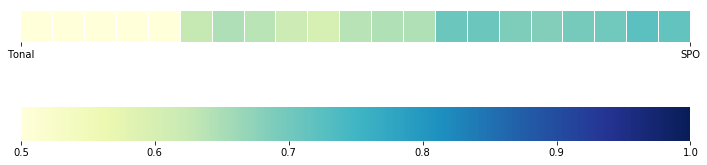

In [183]:
plt.figure(figsize = (12,8))

uniform_data = np.transpose(np.array([[x['score']] for x in scores_spoton]))
ax = sns.heatmap(uniform_data, cmap='YlGnBu', linewidths=0.005,vmin=0.5,vmax=1., square=True, yticklabels=[],cbar_kws={"orientation": "horizontal"})
plt.xticks((0,21),('Sentiment', 'SPO'))
plt.yticks(rotation=0) 
plt.show()

In [80]:
best_rolton, best_p_rolton, scores_rolton = get_class_ids(spo=False, roles=True, tonal=True)

100%|██████████| 21/21 [00:40<00:00,  1.93s/it]


In [191]:
best_p_rolton, experiment(best_p_rolton, y_true)

({'neg_pol': 0.11999999999999994,
  'objects': 0.0,
  'pairs': 0.85000000000000009,
  'pos_pol': 0.029999999999999985,
  'subjects': 0.0},
 (0.72881355932203384, 0.9662921348314607, 0.83091787439613529))

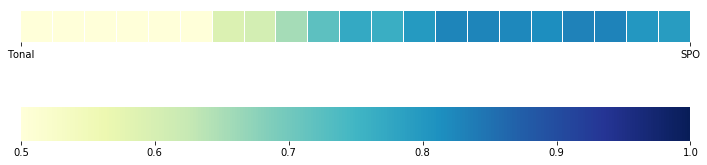

In [184]:
plt.figure(figsize = (12,8))

uniform_data = np.transpose(np.array([[x['score']] for x in scores_rolton]))
ax = sns.heatmap(uniform_data, cmap='YlGnBu', linewidths=0.005,vmin=0.5,vmax=1., square=True, yticklabels=[],cbar_kws={"orientation": "horizontal"})
plt.xticks((0,21),('Tonal', 'Roles'))
plt.yticks(rotation=0) 
plt.show()

In [19]:
class_ids = {
         'subjects': 0.0,
         'objects':0.0,
         'pairs': 1.,
         'neg_pol': 0.0,
         'pos_pol': 0.0       
    }


experiment(class_ids, dictionary, batch_vectorizer, y_true)

# pairwise(y_pred,y_true), pairwise2(y_pred,y_true)

(0.66923076923076918, 0.97752808988764039, 0.79452054794520555)

In [22]:
class_ids = {
         'subjects': 0.,
         'objects':0.,
         'pairs': 0.,
         'neg_pol': 0.2,
         'pos_pol': 0.8        
    }

experiment(class_ids, dictionary, batch_vectorizer, y_true)

(0.90000000000000002, 0.10112359550561797, 0.18181818181818182)

### 3.2 ЛНР и ДНР - национализация предприятий
#### 3.2.1 - ЛНР и ДНР (2  мнения)

In [154]:
f = open('./lnr_dnr/lnr_dnr_vw','r')
t = open('./lnr_dnr/lnr_dnr2_vw','w')
i = 0
for line in f.readlines():
    if line.split('|mark')[1].split(' ')[3] != '0':
        t.write(str(i)+' '+' '.join(line.split(' ')[1:]))
        i+=1
f.close()
t.close()

In [155]:
f = open('./lnr_dnr/lnr_dnr2_vw','r')
marks = []
i = 0
for line in f.readlines():
    marks.append(int(line.split('|mark')[1].split(' ')[3]))

In [156]:
len(marks)

58

In [157]:
data_path = './lnr_dnr/lnr_dnr2_vw'
batches_path = './lnr_dnr/batches/'

batch_vectorizer = artm.BatchVectorizer(data_path=data_path, collection_name='',
                                            data_format='vowpal_wabbit', batch_size = 100, 
                                            target_folder=batches_path)
dictionary = batch_vectorizer.dictionary
dictionary

artm.Dictionary(name=fa7bacc7-a989-434f-bdb5-458772839fc1, num_entries=3542)

In [158]:
y_true = np.abs(np.array([0 if x == 2 else 1 for x in marks])-1)

In [159]:
class_ids = {'subjects': 0.2,
             'objects': 0.8}
spo_tau = adjust_tau(class_ids, dictionary, batch_vectorizer, y_true)
class_ids = {'pairs': 1.}
rol_tau = adjust_tau(class_ids, dictionary, batch_vectorizer, y_true)
class_ids = {'pos_pol': 0.5,
             'neg_pol': 0.5}
ton_tau = adjust_tau(class_ids, dictionary, batch_vectorizer, y_true)

100%|██████████| 30/30 [00:49<00:00,  1.66s/it]


In [68]:
 class_ids = {
                'subjects': 0.,
                'objects': 0.,
                'pairs': 1.,
                'neg_pol': 0.,
                'pos_pol': 0.
            } 
experiment(class_ids, dictionary, batch_vectorizer, y_true)

(0.8571428571428571, 0.48648648648648651, 0.62068965517241381)

(0.8571428571428571, 0.48648648648648651, 0.62068965517241381)

In [106]:
 class_ids = {
                'subjects': 0.2,
                'objects': 0.8,
                'pairs': 0.,
                'neg_pol': 0.,
                'pos_pol': 0.
            } 
experiment(class_ids, dictionary, batch_vectorizer, y_true)

(0.59090909090909094, 0.70270270270270274, 0.64197530864197538)

(0.59090909090909094, 0.70270270270270274, 0.64197530864197538)

In [75]:
 class_ids = {
                'subjects': 0.,
                'objects': 0.,
                'pairs': 0.,
                'neg_pol': 0.5,
                'pos_pol': 0.5
            } 
experiment(class_ids, dictionary, batch_vectorizer, y_true)

(0.875, 0.56756756756756754, 0.68852459016393441)

(0.875, 0.56756756756756754, 0.68852459016393441)

In [43]:
# Subject-object balance
scores = []
best = 0
for x in tqdm(np.arange(0.05,1,0.05)):
    class_ids = {
                'subjects': x,
                'objects': (1-x),
                'pairs': 0,
                'neg_pol': 0,
                'pos_pol': 0
            } 
    model = topic_model(class_ids,dictionary, 3,1,2,2)
    model.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=40)

    theta = model.get_theta()
    X = theta.as_matrix()[:-1].T

    y_pred = X.argmax(axis=1)
    pr,rec, f1 = precision_score(y_true,y_pred), recall_score(y_true,y_pred), f1_score(y_true,y_pred)
    scores.append({"score": f1, "class_ids":class_ids})
    if f1>best:
        best = f1
        best_p = class_ids
best, best_p

100%|██████████| 19/19 [00:35<00:00,  1.89s/it]



(0.76923076923076927,
 {'neg_pol': 0,
  'objects': 0.90000000000000002,
  'pairs': 0,
  'pos_pol': 0,
  'subjects': 0.10000000000000001})

(0.76923076923076927,
 {'neg_pol': 0,
  'objects': 0.90000000000000002,
  'pairs': 0,
  'pos_pol': 0,
  'subjects': 0.10000000000000001})

In [14]:
sorted(scores, key=lambda k: k['score'], reverse=True) 

[{'class_ids': {'neg_pol': 0,
   'objects': 0.90000000000000002,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.10000000000000001},
  'score': 0.76923076923076927},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.84999999999999998,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.15000000000000002},
  'score': 0.76086956521739135},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.29999999999999993,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.70000000000000007},
  'score': 0.74285714285714288},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.94999999999999996,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.050000000000000003},
  'score': 0.72289156626506035},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.19999999999999996,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.80000000000000004},
  'score': 0.67692307692307696},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.24999999999999989,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.75000000000000011},
  'score': 0.65573770491803285

[{'class_ids': {'neg_pol': 0,
   'objects': 0.90000000000000002,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.10000000000000001},
  'score': 0.76923076923076927},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.84999999999999998,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.15000000000000002},
  'score': 0.76086956521739135},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.29999999999999993,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.70000000000000007},
  'score': 0.74285714285714288},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.94999999999999996,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.050000000000000003},
  'score': 0.72289156626506035},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.19999999999999996,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.80000000000000004},
  'score': 0.67692307692307696},
 {'class_ids': {'neg_pol': 0,
   'objects': 0.24999999999999989,
   'pairs': 0,
   'pos_pol': 0,
   'subjects': 0.75000000000000011},
  'score': 0.65573770491803285

In [15]:
# Positive-negative balance
scores = []
best = 0
for x in tqdm(np.arange(0.05,1,0.05)):
    class_ids = {
                'subjects': 0,
                'objects': 0,
                'pairs': 0,
                'neg_pol': x,
                'pos_pol': 1-x
            } 
    model = topic_model(class_ids,dictionary, 3,1,2,2)
    model.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=40)

    theta = model.get_theta()
    X = theta.as_matrix()[:-1].T

    y_pred = X.argmax(axis=1)
    pr,rec, f1 = precision_score(y_true,y_pred), recall_score(y_true,y_pred), f1_score(y_true,y_pred)
    scores.append({"score": f1, "class_ids":class_ids})
    if f1>best:
        best = f1
        best_p = class_ids
best, best_p

  0%|          | 0/19 [00:00<?, ?it/s]/Users/danielfeldman/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danielfeldman/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
  5%|▌         | 1/19 [00:01<00:26,  1.47s/it]/Users/danielfeldman/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/danielfeldman/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined a

(0.68852459016393441,
 {'neg_pol': 0.5, 'objects': 0, 'pairs': 0, 'pos_pol': 0.5, 'subjects': 0})

(0.68852459016393441,
 {'neg_pol': 0.5, 'objects': 0, 'pairs': 0, 'pos_pol': 0.5, 'subjects': 0})

In [16]:
sorted(scores, key=lambda k: k['score'], reverse=True) 

[{'class_ids': {'neg_pol': 0.5,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.5,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.55000000000000004,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.44999999999999996,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.60000000000000009,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.39999999999999991,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.65000000000000013,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.34999999999999987,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.70000000000000007,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.29999999999999993,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.75000000000000011,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.24999999999999989,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.8

[{'class_ids': {'neg_pol': 0.5,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.5,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.55000000000000004,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.44999999999999996,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.60000000000000009,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.39999999999999991,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.65000000000000013,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.34999999999999987,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.70000000000000007,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.29999999999999993,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.75000000000000011,
   'objects': 0,
   'pairs': 0,
   'pos_pol': 0.24999999999999989,
   'subjects': 0},
  'score': 0.68852459016393441},
 {'class_ids': {'neg_pol': 0.8

In [44]:
best, best_p, scores = get_class_ids(dictionary=dictionary, batch_vectorizer=batch_vectorizer)

100%|██████████| 20/20 [07:33<00:00, 22.70s/it]



In [45]:
experiment(best_p, dictionary, batch_vectorizer, y_true), best_p

((0.76595744680851063, 0.97297297297297303, 0.8571428571428571),
 {'neg_pol': 0.39999999999999997,
  'objects': 0.045000000000000005,
  'pairs': 0.050000000000000003,
  'pos_pol': 0.39999999999999997,
  'subjects': 0.10500000000000001})

((0.76595744680851063, 0.97297297297297303, 0.8571428571428571),
 {'neg_pol': 0.39999999999999997,
  'objects': 0.045000000000000005,
  'pairs': 0.050000000000000003,
  'pos_pol': 0.39999999999999997,
  'subjects': 0.10500000000000001})

In [46]:
sorted(scores, key=lambda k: k['score'], reverse=True) 

[{'class_ids': {'neg_pol': 0.39999999999999997,
   'objects': 0.045000000000000005,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.39999999999999997,
   'subjects': 0.10500000000000001},
  'score': 0.8571428571428571},
 {'class_ids': {'neg_pol': 0.375,
   'objects': 0.059999999999999998,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.375,
   'subjects': 0.13999999999999999},
  'score': 0.8571428571428571},
 {'class_ids': {'neg_pol': 0.27499999999999997,
   'objects': 0.12,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.27499999999999997,
   'subjects': 0.27999999999999997},
  'score': 0.82352941176470595},
 {'class_ids': {'neg_pol': 0.29999999999999993,
   'objects': 0.10500000000000001,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.29999999999999993,
   'subjects': 0.245},
  'score': 0.81159420289855067},
 {'class_ids': {'neg_pol': 0.32499999999999996,
   'objects': 0.090000000000000011,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.32499999999999996,
   'subjects': 0

[{'class_ids': {'neg_pol': 0.39999999999999997,
   'objects': 0.045000000000000005,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.39999999999999997,
   'subjects': 0.10500000000000001},
  'score': 0.8571428571428571},
 {'class_ids': {'neg_pol': 0.375,
   'objects': 0.059999999999999998,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.375,
   'subjects': 0.13999999999999999},
  'score': 0.8571428571428571},
 {'class_ids': {'neg_pol': 0.27499999999999997,
   'objects': 0.12,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.27499999999999997,
   'subjects': 0.27999999999999997},
  'score': 0.82352941176470595},
 {'class_ids': {'neg_pol': 0.29999999999999993,
   'objects': 0.10500000000000001,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.29999999999999993,
   'subjects': 0.245},
  'score': 0.81159420289855067},
 {'class_ids': {'neg_pol': 0.32499999999999996,
   'objects': 0.090000000000000011,
   'pairs': 0.050000000000000003,
   'pos_pol': 0.32499999999999996,
   'subjects': 0

In [108]:
best_sporol, best_p_sporol, scores_sporol = get_class_ids(dictionary=dictionary, batch_vectorizer=batch_vectorizer, \
                                                          spo=True, roles=True, tonal=False)

100%|██████████| 21/21 [01:26<00:00,  4.13s/it]


In [109]:
best_p_sporol, experiment(best_p_sporol, dictionary, batch_vectorizer, y_true)

({'neg_pol': 0.0,
  'objects': 0.64000000000000012,
  'pairs': 0.19999999999999996,
  'pos_pol': 0.0,
  'subjects': 0.16000000000000003},
 (0.86206896551724133, 0.67567567567567566, 0.75757575757575757))

({'neg_pol': 0.0,
  'objects': 0.64000000000000012,
  'pairs': 0.19999999999999996,
  'pos_pol': 0.0,
  'subjects': 0.16000000000000003},
 (0.86206896551724133, 0.67567567567567566, 0.75757575757575757))

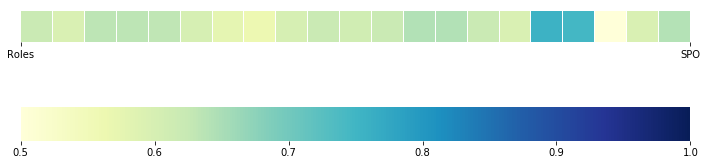

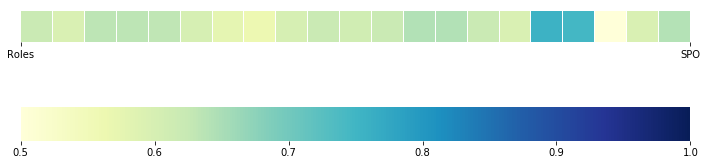

In [110]:
plt.figure(figsize = (12,8))

uniform_data = np.transpose(np.array([[x['score']] for x in scores_sporol]))
ax = sns.heatmap(uniform_data, cmap='YlGnBu', linewidths=0.005,vmin=0.5,vmax=1., square=True, yticklabels=[],cbar_kws={"orientation": "horizontal"})
plt.xticks((0,21),('Roles', 'SPO'))
plt.yticks(rotation=0) 
plt.show()

In [111]:
best_spoton, best_p_spoton, scores_spoton = get_class_ids(dictionary=dictionary, batch_vectorizer=batch_vectorizer,\
                                                          spo=True, roles=False, tonal=True)

100%|██████████| 21/21 [01:41<00:00,  4.84s/it]



In [112]:
best_p_spoton, experiment(best_p_spoton, dictionary, batch_vectorizer, y_true)

({'neg_pol': 0.22000000000000003,
  'objects': 0.36000000000000004,
  'pairs': 0.0,
  'pos_pol': 0.33000000000000002,
  'subjects': 0.090000000000000011},
 (0.82857142857142863, 0.78378378378378377, 0.80555555555555547))

({'neg_pol': 0.22000000000000003,
  'objects': 0.36000000000000004,
  'pairs': 0.0,
  'pos_pol': 0.33000000000000002,
  'subjects': 0.090000000000000011},
 (0.82857142857142863, 0.78378378378378377, 0.80555555555555547))

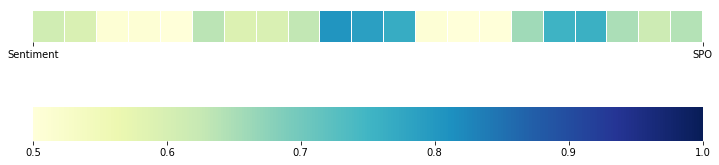

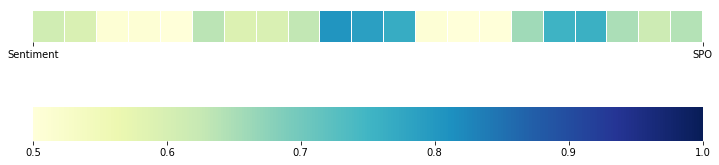

In [113]:
plt.figure(figsize = (12,8))

uniform_data = np.transpose(np.array([[x['score']] for x in scores_spoton]))
ax = sns.heatmap(uniform_data, cmap='YlGnBu', linewidths=0.005,vmin=0.5,vmax=1., square=True, yticklabels=[],cbar_kws={"orientation": "horizontal"})
plt.xticks((0,21),('Sentiment', 'SPO'))
plt.yticks(rotation=0) 
plt.show()

In [114]:
best_rolton, best_p_rolton, scores_rolton = get_class_ids(dictionary=dictionary, batch_vectorizer=batch_vectorizer,\
                                                          spo=False, roles=True, tonal=True)

100%|██████████| 21/21 [01:08<00:00,  3.27s/it]



In [115]:
best_p_rolton, experiment(best_p_rolton, dictionary, batch_vectorizer, y_true)

({'neg_pol': 0.05999999999999997,
  'objects': 0.0,
  'pairs': 0.85000000000000009,
  'pos_pol': 0.089999999999999941,
  'subjects': 0.0},
 (0.90476190476190477, 0.51351351351351349, 0.65517241379310343))

({'neg_pol': 0.05999999999999997,
  'objects': 0.0,
  'pairs': 0.85000000000000009,
  'pos_pol': 0.089999999999999941,
  'subjects': 0.0},
 (0.90476190476190477, 0.51351351351351349, 0.65517241379310343))

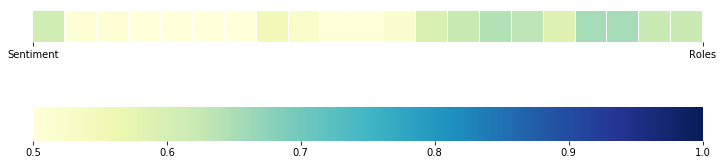

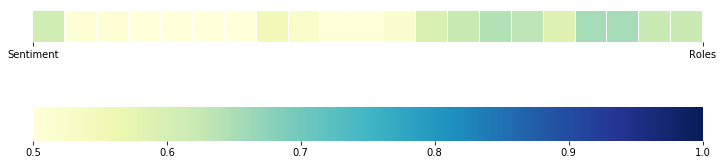

In [116]:
plt.figure(figsize = (12,8))

uniform_data = np.transpose(np.array([[x['score']] for x in scores_rolton]))
ax = sns.heatmap(uniform_data, cmap='YlGnBu', linewidths=0.005,vmin=0.5,vmax=1., square=True, yticklabels=[],cbar_kws={"orientation": "horizontal"})
plt.xticks((0,21),('Sentiment', 'Roles'))
plt.yticks(rotation=0) 
plt.show()

#### 3.2.1 Трамп и парижское соглашение (3 мнения)

In [478]:
f = open('./trump/trump_vw','r')
marks = []
i = 0
for line in f.readlines():
    marks.append(int(line.split('|mark')[1].split(' ')[3]))

In [793]:
data_path = './trump/trump_vw'
batches_path = './trump/batches/'

batch_vectorizer = artm.BatchVectorizer(data_path=data_path, collection_name='',
                                            data_format='vowpal_wabbit', batch_size = 100, 
                                            target_folder=batches_path)
dictionary = batch_vectorizer.dictionary
dictionary

artm.Dictionary(name=3824a285-918b-4fac-8115-55f801b376a2, num_entries=3002)

In [487]:
import sklearn
from sklearn import cluster

In [809]:
class_ids = {
         'subjects': 0.3,
         'objects':0.12,
         'pairs': 0.43,
         'neg_pol': 0.1,
         'pos_pol': 0.05    
    }

model = topic_model(class_ids,4,1,2,2)
model.fit_offline(batch_vectorizer=batch_vectorizer,num_collection_passes=40)

theta = model.get_theta()
X = theta.as_matrix()[:-1].T

y_true = np.array(marks)
y_pred = X.argmax(axis=1)

# kmeans = sklearn.cluster.KMeans(n_clusters=3).fit(X)
# y_pred = kmeans.labels_

pairwise(y_pred,y_true), pairwise2(y_pred,y_true)

(0.6074941969713717, 0.552250540522833)

In [799]:
Counter(y_pred)

Counter({0: 48, 1: 24, 2: 149})

In [800]:
map_clusters(y_true, y_pred)

{0: 2, 1: 0, 2: 2}

#### 3.2.2 - ЛНР и ДНР (3  мнения)

In [ ]:
f = open('./lnr_dnr/lnr_dnr_vw','r')
marks = []
i = 0
for line in f.readlines():
    marks.append(int(line.split('|mark')[1].split(' ')[3]))